<a href="https://colab.research.google.com/github/sitinurfatimah/Final-Project-Second-Semester/blob/main/Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Advanced Statistical Data Analysis
## Chi-Squared Group
1. Camelia Miftahur Rizki K. H. (23102210010)
2. Iftha Nikmatul Khasanah (23102210024)
3. Mina Darmayani (23102210038)
4. Salsabila Putri Lubis (23102210050)
5. Siti Nur Fatimah (23102210055)
6. Vito Valentinus (23102210064)

### Regression Analysis

## Step 1: Import Packages & Classes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LinearRegression

## Step 2: Provide Data

**Data description**

 The table below shows

 `y` =  Online Shopping Realitation (Rp)

 `x1` = Age (years)

 `x2` = Gender (Female:1, Male:0)

 `x3` = Domicile (Jabodetabek:1, Other:0)

 `x4` = Job (Worker:1, No Job:0)

 `x5` = Spending Sectors (quantity)

 `x6` = Online Shopping Budget (Rp)

 `x7` = Gadget Times (hours)

 `x8` = Social Media Times (hours)

 `x9` = Online Shopping Apps (quantity)

 `x10` = Frequency Open the Apps (quantity)

 `x11` = Frequency Ads (quantity)

 `x12` = Frequency Check-out (quantity)

 `x13` = Frequency Voucher (quantity)

 `x14` = Satisfaction of Vouchers (in Range 1-4)

 `x15` = Discount Voucher (Rp)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Final Project.csv to Data Final Project.csv


In [ ]:
df = pd.read_csv('Data Final Project.csv')
df

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation
0,20,1,0,0,7,200000,18,8,2,3,2,4,3,4,35000,150000
1,19,1,0,0,5,100000,15,12,4,1,4,2,4,3,15000,100000
2,19,0,1,0,6,500000,12,12,5,2,5,4,3,4,30000,300000
3,18,1,0,0,6,300000,10,5,8,5,8,20,4,4,30000,350000
4,19,1,0,0,4,200000,10,6,5,3,5,4,3,3,35000,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,0,0,6,500000,12,5,2,1,2,4,2,1,20000,300000
96,20,1,1,1,5,450000,8,3,1,1,1,5,4,4,13000,450000
97,18,0,0,0,3,1000000,10,2,3,1,3,5,2,3,25000,300000
98,19,1,1,0,7,300000,5,2,2,1,2,3,2,2,15000,300000


## Step 3: Data Summary

In [ ]:
df.describe() #menampilkan deskripsi statistik dari semua variabel

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,19.18000,0.660000,0.730000,0.200000,5.010000,335800.000000,10.850000,5.440000,4.160000,2.620000,4.040000,4.560000,3.190000,3.270000,20950.090000,2.753400e+05
std,0.71605,0.476095,0.446196,0.402015,1.720318,216450.614891,4.112988,3.742521,3.014175,1.905759,2.810227,3.610646,0.677115,0.802207,10656.592298,2.042294e+05
min,18.00000,0.000000,0.000000,0.000000,1.000000,100000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5000.000000,7.500000e+04
25%,19.00000,0.000000,0.000000,0.000000,4.000000,200000.000000,8.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,15000.000000,1.500000e+05
50%,19.00000,1.000000,1.000000,0.000000,5.000000,300000.000000,10.000000,5.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,20000.000000,2.000000e+05
75%,19.25000,1.000000,1.000000,0.000000,6.000000,500000.000000,14.000000,8.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,25000.000000,3.000000e+05
max,22.00000,1.000000,1.000000,1.000000,9.000000,1000000.000000,24.000000,20.000000,15.000000,10.000000,15.000000,20.000000,4.000000,4.000000,70000.000000,1.500000e+06


In [ ]:
df.head() #menampilkan 5 data teratas

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation
0,20,1,0,0,7,200000,18,8,2,3,2,4,3,4,35000,150000
1,19,1,0,0,5,100000,15,12,4,1,4,2,4,3,15000,100000
2,19,0,1,0,6,500000,12,12,5,2,5,4,3,4,30000,300000
3,18,1,0,0,6,300000,10,5,8,5,8,20,4,4,30000,350000
4,19,1,0,0,4,200000,10,6,5,3,5,4,3,3,35000,200000


In [ ]:
df.tail() #menampilkan 5 data terbawah

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation
95,19,0,0,0,6,500000,12,5,2,1,2,4,2,1,20000,300000
96,20,1,1,1,5,450000,8,3,1,1,1,5,4,4,13000,450000
97,18,0,0,0,3,1000000,10,2,3,1,3,5,2,3,25000,300000
98,19,1,1,0,7,300000,5,2,2,1,2,3,2,2,15000,300000
99,19,1,1,1,6,300000,10,2,15,2,3,4,3,4,30000,250000


<Axes: xlabel='Online Shopping Realitation', ylabel='Count'>

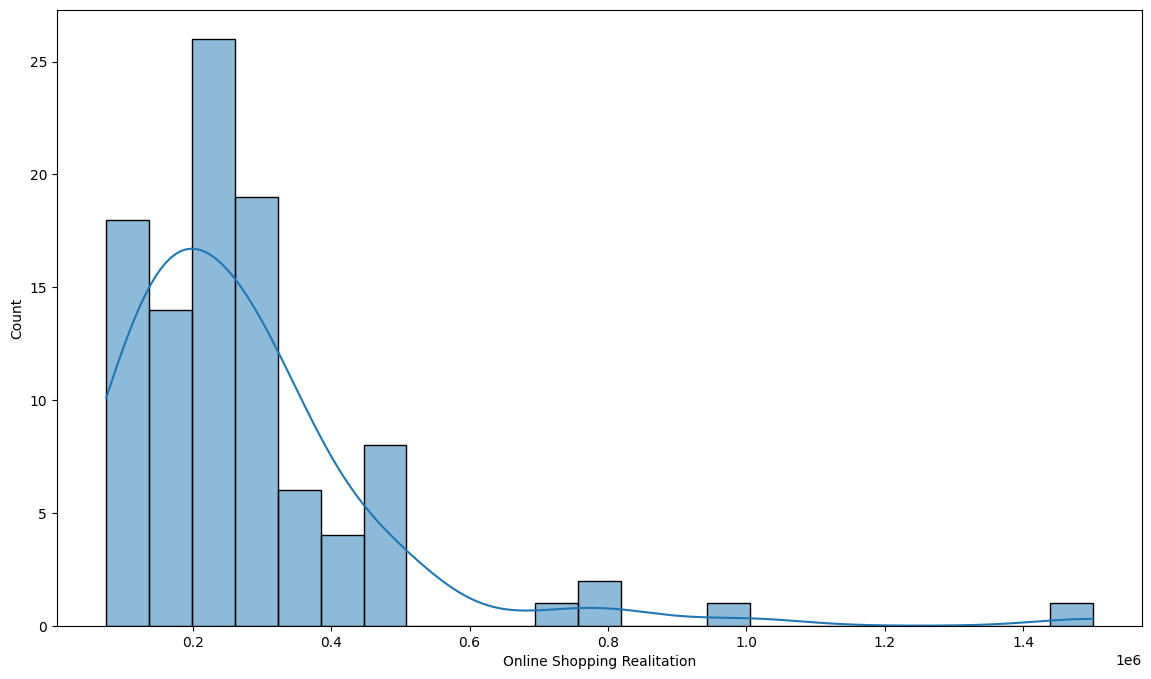

In [ ]:
filter_data = df.dropna(subset=['Online Shopping Realitation'])
plt.figure(figsize=(14,8))
sns.histplot(filter_data['Online Shopping Realitation'], kde=True)

In [ ]:
online_shopping_realitation_mode = df['Online Shopping Realitation'].mode()
online_shopping_realitation_median = df['Online Shopping Realitation'].median()
online_shopping_realitation_mean = df['Online Shopping Realitation'].mean()
print ('Online Shopping Realitation MODE = ',online_shopping_realitation_mode)
print ('Online Shopping Realitation MEDIAN = ',online_shopping_realitation_median)
print ('Online Shopping Realitation MEAN = ',online_shopping_realitation_mean)

Online Shopping Realitation MODE =  0    200000
Name: Online Shopping Realitation, dtype: int64
Online Shopping Realitation MEDIAN =  200000.0
Online Shopping Realitation MEAN =  275340.0


**Analisis**

Dari grafik Online Shopping Realitation di atas diperoleh bentuk right-skewed histogram yang berarti distribusi data cenderung lebih banyak di kiri atau Mode<Median<Mean. Pada data Online Shopping Realitation (mode = 200000, median = 200000, dan mean = 00) sehingga sesuai dengan deskripsi right-skewed histogram

<Axes: xlabel='Online Shopping Budget', ylabel='Count'>

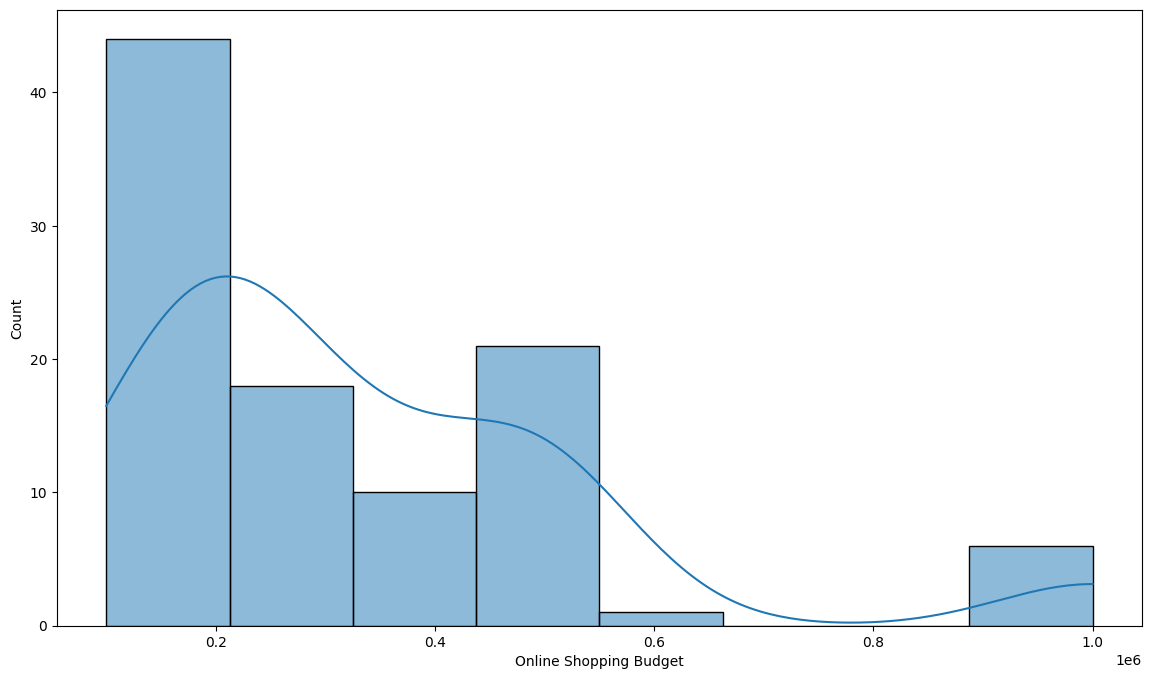

In [ ]:
filter_data = df.dropna(subset=['Online Shopping Budget'])
plt.figure(figsize=(14,8))
sns.histplot(filter_data['Online Shopping Budget'], kde=True)

In [ ]:
online_shopping_budget_mode = df['Online Shopping Budget'].mode()
online_shopping_budget_median = df['Online Shopping Budget'].median()
online_shopping_budget_mean = df['Online Shopping Budget'].mean()
print ('Online Shopping Budget MODE = ',online_shopping_budget_mode)
print ('Online Shopping Budget MEDIAN = ',online_shopping_budget_median)
print ('Online Shopping Budget MEAN = ',online_shopping_budget_mean)

Online Shopping Budget MODE =  0    200000
Name: Online Shopping Budget, dtype: int64
Online Shopping Budget MEDIAN =  300000.0
Online Shopping Budget MEAN =  335800.0


**Analisis**

Dari grafik Online Shopping Budget di atas diperoleh bentuk right-skewed histogram yang berarti distribusi data cenderung lebih banyak di kiri atau Mode<Median<Mean. Pada data Online Shopping Budget (mode = 200000, median = 300000, dan mean = 335800) sehingga sesuai dengan deskripsi right-skewed histogram

<Axes: xlabel='Discount Voucher', ylabel='Count'>

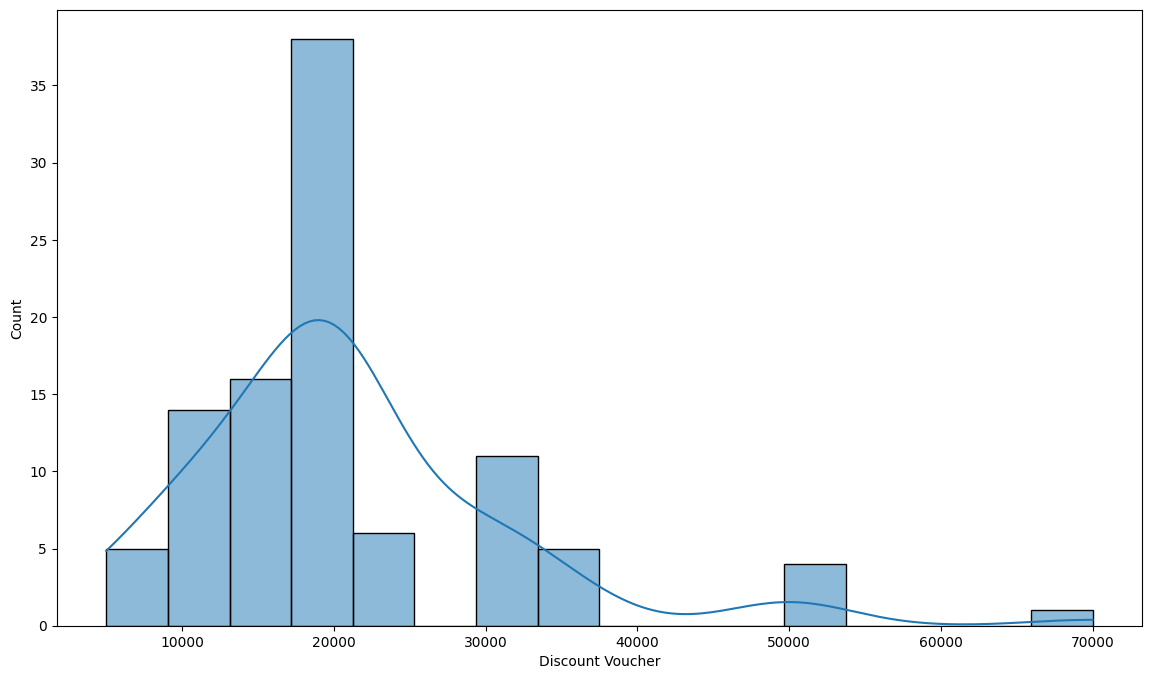

In [ ]:
filter_data = df.dropna(subset=['Discount Voucher'])
plt.figure(figsize=(14,8))
sns.histplot(filter_data['Discount Voucher'], kde=True)

In [ ]:
discount_voucher_mode = df['Discount Voucher'].mode()
discount_voucher_median = df['Discount Voucher'].median()
discount_voucher_mean = df['Discount Voucher'].mean()
print ('Discount Voucher MODE = ',discount_voucher_mode)
print ('Discount Voucher MEDIAN = ',discount_voucher_median)
print ('Discount Voucher MEAN = ',discount_voucher_mean)

Discount Voucher MODE =  0    20000
Name: Discount Voucher, dtype: int64
Discount Voucher MEDIAN =  20000.0
Discount Voucher MEAN =  20950.09


**Analisis**

Dari grafik Discount Voucher di atas diperoleh bentuk right-skewed histogram yang berarti distribusi data cenderung lebih banyak di kiri atau Mode<Median<Mean. Pada data Discount Voucher (mode = 20000, median = 20000, dan mean = 20950.09) sehingga sesuai dengan deskripsi right-skewed histogram.

In [ ]:
filter_data = df.dropna(subset=['Discount Voucher'])
plt.figure(figsize=(14,8))
sns.histplot(filter_data['Discount Voucher'], kde=True)

<Figure size 800x600 with 0 Axes>

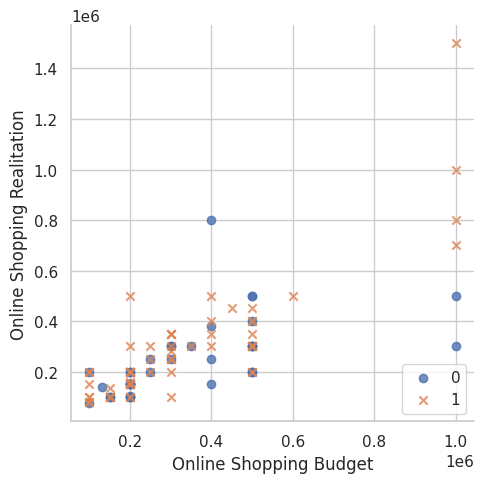

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.lmplot(x="Online Shopping Budget", y= "Online Shopping Realitation", data=df, fit_reg=False, hue="Gender", legend=False, markers=["o","x"])
plt.legend(loc="lower right")
plt.show()

Berdasarkan grafik diatas yang menunjukkan relasi antara online shopping budget terhadap online shopping realitation dan gender (0=Laki-laki dan 1=perempuan). Terlihat dimana penyebaran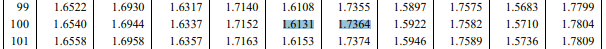 secara keseluruhannya lebih banyak diarea rendah atau sebelah kiri dengan pertumbuhan keatas, hal  ini menggambarkan relasi online shopping terhadap online shopping realitation positif dengan mayoritas perempuan yang lebih banyak dibandingkan laki-laki terhadap kedua variabel lainnya.

<Figure size 800x600 with 0 Axes>

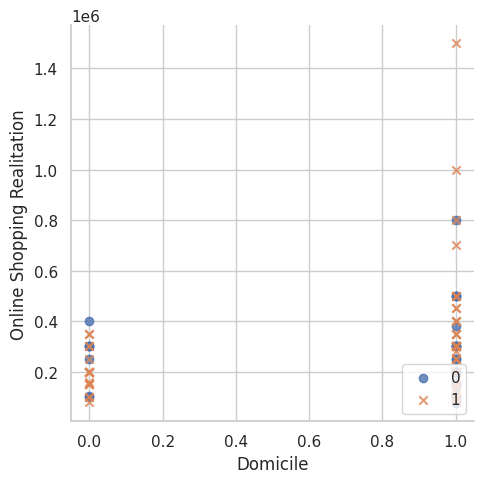

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.lmplot(x="Domicile", y= "Online Shopping Realitation", data=df, fit_reg=False, hue="Gender", legend=False, markers=["o","x"])
plt.legend(loc="lower right")
plt.show()

Berdasarkan grafik diatas yang menunjukkan relasi antara Domicile (0.0=Luar Jabodetabek dan 1.0=Jabodetabek) terhadap online shopping realitation dan gender (0=Laki-laki dan 1=perempuan). Bisa kita lihat bahwa didaerah luar jabodetabek ternyata online shopping realitationnya lebih tiggi laki-laki dibandingkan perempuan, namun berbanding terbalik dengan orang-orang yang bertempat tinggal didalam jabodetabek, online shopping realitationnya lebih tinggi perempuan dibandingkan laki-laki.

In [ ]:
df.corr()

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation
Age,1.000000,0.062815,-0.130887,0.224574,-0.108076,-0.152790,0.043558,-0.063776,-0.064959,-0.075205,-0.058831,-0.207380,-0.008750,0.002462,-0.054384,-0.146580
Gender,0.062815,1.000000,-0.103658,-0.116105,0.016526,-0.035561,0.066543,0.164174,0.115719,0.134484,0.093314,0.129508,0.077080,0.216341,-0.188534,0.079219
Domicile,-0.130887,-0.103658,1.000000,0.078836,0.095668,0.153388,-0.071828,-0.049117,-0.140297,0.008790,-0.176579,0.069720,-0.029087,0.064623,-0.051722,0.187350
Job,0.224574,-0.116105,0.078836,1.000000,0.084711,-0.001857,-0.030545,-0.119503,-0.101698,0.073832,-0.194912,0.068197,0.081636,0.081435,0.221627,0.049605
Spending Sectors,-0.108076,0.016526,0.095668,0.084711,1.000000,0.095057,0.195792,0.171887,0.173060,0.010414,0.160798,0.355225,0.076396,0.012662,0.198381,0.147219
Online Shopping Budget,-0.152790,-0.035561,0.153388,-0.001857,0.095057,1.000000,0.119214,0.016395,-0.079468,0.285285,-0.078101,0.327063,0.068217,0.026376,0.041377,0.760298
Gadget Times,0.043558,0.066543,-0.071828,-0.030545,0.195792,0.119214,1.000000,0.578515,0.096470,-0.004768,0.112385,0.063529,0.104638,-0.064136,0.105609,0.002166
Social Media Times,-0.063776,0.164174,-0.049117,-0.119503,0.171887,0.016395,0.578515,1.000000,0.000860,0.009517,0.040568,0.057827,0.014509,0.034048,-0.035159,-0.083904
Online Shopping Apps,-0.064959,0.115719,-0.140297,-0.101698,0.173060,-0.079468,0.096470,0.000860,1.000000,0.126749,0.917455,-0.017597,0.083938,0.161583,0.002155,-0.019911
Frequency Open the Apps,-0.075205,0.134484,0.008790,0.073832,0.010414,0.285285,-0.004768,0.009517,0.126749,1.000000,0.149979,0.308681,0.150448,0.259395,0.025408,0.408593


<Axes: >

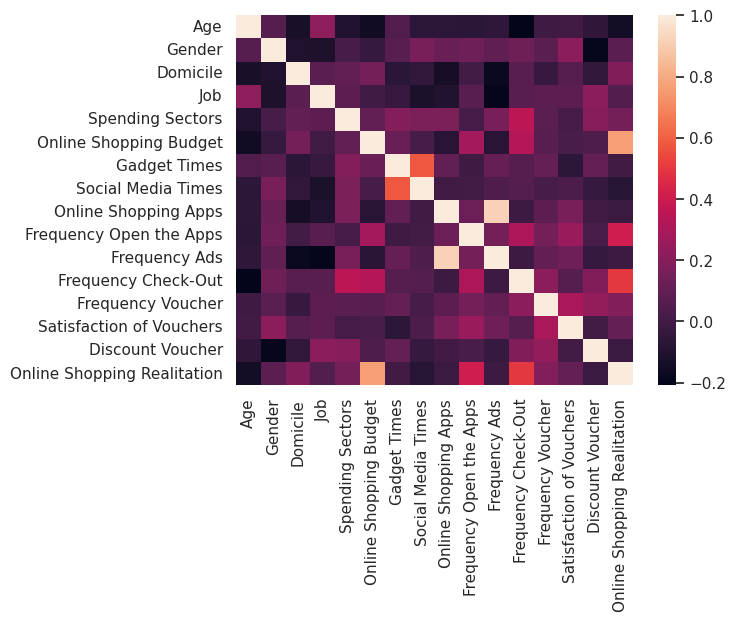

In [ ]:
sns.heatmap(df.corr())

Berdasarkan heatmap di atas, diperoleh correlation coefficient dengan batas -0,2≤x≤1. Apabila semakin mendekati 1, warnanya semakin cerah yang menunjukkan bahwa variabel x1 memiliki hubungan kuat dengan variabel x2. Misalnya, hubungan Online Shopping Budget dengan Online Shopping Realitation yang bernilai 0,7603. Correlationnya mendekati 1 sehingga warna pada heatmap cerah. Jadi, Online Shopping Budget memiliki hubungan hubungan positif kuat (0≤x≤0,5) untuk menggambarkan Online Shopping Realitation. Kenaikan Oline shopping budget berdampak pada kenaikan Online Shopping Realitation.

Hal itu berlaku sebaliknya, apabila semakin mendekati -0.2 warnanya akan semakin gelap, ini menunjukkan bahwa variabel x1 berhubungan negative dengan variabel x2. Misalnya, hubungan Age dengan Online Shopping Realitation yang bernilai -0,1466. Nilai tersebut mendekati -0,2 sehingga warnanya sangat gelap. Jadi, Age memiliki hubungan hubungan negatif lemah (-0,5≤x≤0) untuk menggambarkan Online Shopping Realitation (rentang usia responden yaitu 18-22 tahun). Bertambahnya Age atau mendekati 22 tahun berdampak pada penurunan Online Shopping Realitation, sebaliknya semakin kecilnya Age atau mendekati 18 tahun mengakibatkan kenaikan Online Shopping Realitation.

Setiap variabel yang yang tidak berhubungan dengan variabel lain atau hanya dirinya sendiri akan memiliki warna paling cerah atau sama dengan 1.

## Step 4: Create and Fit a Regression Model

With `.fit()` you can calculate the optimal values of the weight $b_0$, $b_1$, $b_2$, $b_3$, $b_4$, $b_5$, $b_6$, $b_7$, $b_8$, $b_9$, $b_{10}$, $b_{11}$, $b_{12}$, $b_{13}$, $b_{14}$, and $b_{15}$,  using the existing input and output ($x$ and $y$) as the argumnets.

In [ ]:
LR = LinearRegression()

In [ ]:
X = df[["Age","Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]]
y = df[["Online Shopping Realitation"]]
model = LR.fit(X,y) #create model regresi dari X dan y

### Coefficient Determination - $R^2$

In [ ]:
R_squared = model.score(X,y)
print('Coefficient of Determination in this model is:', R_squared)

Coefficient of Determination in this model is: 0.7083261451049323


**Analisis**

R Squared menunjukkan seberapa berpengaruh variable independent x terhadap variable dependent y. Dimana variable dependent (x); Age, Gender, Domicile, Job, Spending Sectors, Online Shopping Budget, Gadget Times, Social Media Times, Online Shopping Apps, Frequency Open the Apps, Frequency Ads, Frequency Check-Out, Frequency Voucher, Satisfaction of Vouchers, dan Discount Voucher. Sedangkan variable dependent (y) yaitu Online Shopping Realitation.

Dari model tersebut, menunjukkan bahwa R² = 0.7083261451049322, artinya model regresion yang dibuat bagus karena berada di range antara 0 hingga 1. Semakin mendekati 1 semakin baik.

### Intercept - $b_0$ & Coefficient - $b_1$, $b_2$, $b_3$, $b_4$, $b_5$, $b_6$, $b_7$, $b_8$, $b_9$, $b_{10}$, $b_{11}$, $b_{12}$, $b_{13}$, $b_{14}$, $b_{15}$

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_[0])
print('Coefficient: \n', regr.coef_[0])


Intercept: 
 -88053.62312354473
Coefficient: 
 [ 1.42475497e+02  2.31051366e+04  2.99661107e+04  1.71767089e+04
  3.52301656e+03  6.05576161e-01 -1.65945760e+03 -5.62952614e+03
 -1.08477804e+03  1.39656499e+04  2.52984257e+03  1.30914176e+04
  3.05966877e+04 -1.48466064e+03 -2.24416449e+00]


**Multiple Linear Regression Model:**

$\hat{y}$ = -88053.62312730955 + 142.475497$x_1$ + 23105.1366$x_2$ + 29966.1107$x_3$ + 17176.7089$x_4$ + 3523.01656$x_5$ + 0.605576161$x_6$ - 1659.45760$x_7$ - 5629.52614$x_8$ - 1084.77804$x_9$ + 13965.6499$x_{10}$ + 2529.84257$x_{11}$ + 13091.4176$x_{12}$ + 30596.6877$x_{13}$ - 1484.66064$x_{14}$ - 2.24416449$x_{15}$

## Step 5: Predict response

In [ ]:
C= model.predict(X)
df['Estimated Online Shopping Realitation'] = C #menambahkan kolom estimasi dari Online Shopping Realitation
df

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation,Estimated Online Shopping Realitation
0,20,1,0,0,7,200000,18,8,2,3,2,4,3,4,35000,150000,113229.338176
1,19,1,0,0,5,100000,15,12,4,1,4,2,4,3,15000,100000,53684.113784
2,19,0,1,0,6,500000,12,12,5,2,5,4,3,4,30000,300000,287126.675488
3,18,1,0,0,6,300000,10,5,8,5,8,20,4,4,30000,350000,488025.104898
4,19,1,0,0,4,200000,10,6,5,3,5,4,3,3,35000,200000,132872.380304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,0,0,6,500000,12,5,2,1,2,4,2,1,20000,300000,274565.343433
96,20,1,1,1,5,450000,8,3,1,1,1,5,4,4,13000,450000,413145.731191
97,18,0,0,0,3,1000000,10,2,3,1,3,5,2,3,25000,300000,587195.730579
98,19,1,1,0,7,300000,5,2,2,1,2,3,2,2,15000,300000,235193.901031


In [ ]:
df['Residual']=df['Online Shopping Realitation']-df['Estimated Online Shopping Realitation']
df #menambahkan kolom residual, yang didapat dari pengurangan antara data Online Shopping Realitation dan estimasinya

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual
0,20,1,0,0,7,200000,18,8,2,3,2,4,3,4,35000,150000,113229.338176,3.677066e+04
1,19,1,0,0,5,100000,15,12,4,1,4,2,4,3,15000,100000,53684.113784,4.631589e+04
2,19,0,1,0,6,500000,12,12,5,2,5,4,3,4,30000,300000,287126.675488,1.287332e+04
3,18,1,0,0,6,300000,10,5,8,5,8,20,4,4,30000,350000,488025.104898,-1.380251e+05
4,19,1,0,0,4,200000,10,6,5,3,5,4,3,3,35000,200000,132872.380304,6.712762e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,0,0,6,500000,12,5,2,1,2,4,2,1,20000,300000,274565.343433,2.543466e+04
96,20,1,1,1,5,450000,8,3,1,1,1,5,4,4,13000,450000,413145.731191,3.685427e+04
97,18,0,0,0,3,1000000,10,2,3,1,3,5,2,3,25000,300000,587195.730579,-2.871957e+05
98,19,1,1,0,7,300000,5,2,2,1,2,3,2,2,15000,300000,235193.901031,6.480610e+04


In [ ]:
df['Residual Squared']= df['Residual']**2
df #menambahkan kolom residual squared, yang didapat dari data residual dikuadratkan

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared
0,20,1,0,0,7,200000,18,8,2,3,2,4,3,4,35000,150000,113229.338176,3.677066e+04,1.352082e+09
1,19,1,0,0,5,100000,15,12,4,1,4,2,4,3,15000,100000,53684.113784,4.631589e+04,2.145161e+09
2,19,0,1,0,6,500000,12,12,5,2,5,4,3,4,30000,300000,287126.675488,1.287332e+04,1.657225e+08
3,18,1,0,0,6,300000,10,5,8,5,8,20,4,4,30000,350000,488025.104898,-1.380251e+05,1.905093e+10
4,19,1,0,0,4,200000,10,6,5,3,5,4,3,3,35000,200000,132872.380304,6.712762e+04,4.506117e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,0,0,6,500000,12,5,2,1,2,4,2,1,20000,300000,274565.343433,2.543466e+04,6.469218e+08
96,20,1,1,1,5,450000,8,3,1,1,1,5,4,4,13000,450000,413145.731191,3.685427e+04,1.358237e+09
97,18,0,0,0,3,1000000,10,2,3,1,3,5,2,3,25000,300000,587195.730579,-2.871957e+05,8.248139e+10
98,19,1,1,0,7,300000,5,2,2,1,2,3,2,2,15000,300000,235193.901031,6.480610e+04,4.199830e+09


## Step 6: Import Packages, Classes, and Summary of Model Regression

In [ ]:
import numpy as np
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(df[["Age","Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     13.60
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.25e-16
Time:                        18:16:24   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2637.
Df Residuals:                      84   BIC:                             2679.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.805e+04   3.66e+05     -0.241      0.8

**Hasil Analisis**

Coefficient determination sebesar  0.708 menunjukkan bahwa sekitar 70.8% dari variabilitas dalam Online Shopping Realitation dapat dijelaskan oleh variabilitas dalam Age, Gender, Domicile, Job, Spending Sectors, Online Shopping Budget, Gadget Times, Social Media Times, Online Shopping Apps, Frequency Open the Apps, Frequency Ads, Frequency Check-Out, Frequency Voucher, Satisfaction of Vouchers, Discount Voucher. Hal ini menunjukkan bahwa model regresi linear memberikan gambaran yang cukup baik tentang hubungan antara Age, Gender, Domicile, Job, Spending Sectors, Online Shopping Budget, Gadget Times, Social Media Times, Online Shopping Apps, Frequency Open the Apps, Frequency Ads, Frequency Check-Out, Frequency Voucher, Satisfaction of Vouchers, Discount Voucher dan Online Shopping Realitation dalam dataset ini.

Intercept $cons$ adalah perpotongan dari variable $x$ terhadap Online Shopping Realitation atau nilai Online Shopping Realitation yang diharapkan ketika variable $x$ sama dengan nol. Dalam hal ini intercept dari data tersebut adalah sebesar -8.805e+04.

Nilai dari $x_1$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Age(umur dari mahasiswa). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 142.4755.

Nilai dari $x_2$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Gender(jenis kelamin dari mahasiswa, dimana perempuan bernilai 1, laki-laki bernilai 0). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 2.311e+04.

Nilai dari $x_3$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Domicile(domisili dari mahasiswa, kami bagi jadi 2 bagian yaitu dalam Jabodetabek bernilai 1 dan luar Jabodetabek bernilai 0. Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 2.997e+04.

Nilai dari $x_4$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Job(menanyakan apakah mahasiswa sudah bekerja bernilai satu, jika belum maka bernilai 0). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 1.718e+04.

Nilai dari $x_5$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Spending Sectors(seberapa banyak sector pengeluaran mahasiswa dalam membagi uang bulanan mereka). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 3523.0166.

Nilai dari $x_6$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Online Shopping Budget(seberapa banyak budget yang disiapkan mahasiswa untuk online shopping). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 0.6056.

Nilai dari $x_7$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Gadget Times(berapa lama waktu yang dihabiskan untuk bermain gadget dalam satu hari dengan satuan jam). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai -1659.4576.

Nilai dari $x_8$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Social Media Times(berapa lama waktu yang dihabiskan untuk bermain social media dalam sehari dengan satuan jam). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai -5629.5261.

Nilai dari $x_9$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Online Shopping Apps(berapa banyak aplikasi online shoppe yang dimiliki). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai -1084.7780.

Nilai dari $x_{10}$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Open the Apps(berapa kali membuka aplikasi online shope dalam sehari). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 1.397e+04.

Nilai dari $x_{11}$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Ads(berapa kali menjumpai iklan online shope dalam sehari). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 2529.8426.

Nilai dari $x_{12}$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Checkout(berapa kali melakukan transaksi online shope dalam sebulan). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 1.309e+04.

Nilai dari $x_{13}$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Voucher(seberapa sering mendapatkan tawaran voucher untuk online shope, menggunakan skala dari 1 hingga 4). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai  3.06e+04.

Nilai dari $x_{14}$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Satisfication Voucher(tingkat kepuasan mahasiswa dengan voucher yang didapat, menggunkana skala dari 1 hingga 4). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai -1484.6606.

Nilai dari $x_{15}$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Discount Voucher(jumlah potongna voucher yang digunakan dalam satu kali transaksi online shope, dalam satuan rupiah). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai  -2.2442.

**Model Regresi**

$\hat{y}$ merupakan persamaan yang memprediksi nilai dari y, dalam hal ini variabel y adalah Online Shopping Realitation. $\hat{y}$ dibentuk dengan menggunakan intercept dan koefisien sehingga kita dapat memprediksi bahwa nilai dari Online Shopping Realitation sama dengan -8.805e+04 + 142.4755(Age) + 2.311e+04(Gender) + 2.997e+04(Domicile) + 1.718e+04(Job) + 3523.0166(Spending Sectors) + 0.6056(Online Shopping Budget) - 1659.4576(Gadget Times) - 5629.5261(Social Media Times) - 1084.7780(Online Shopping Apps) + 1.397e+04(Frequency Open the Apps) + 2529.8426(Frequency Ads) + 1.309e+04(Frequency Check Out) + 3.06e+04(Frequency Voucher) - 1484.6606(Satisfication Voucher) - 2.2442(Discount Voucher) atau:

##### $\hat{y}$ = -8.805e+04 + 142.4755$x_1$ + 2.311e+04$x_2$ + 2.997e+04$x_3$ + 1.718e+04$x_4$ + 3523.0166$x_5$ + 0.6056$x_6$ - 1659.4576$x_7$ - 5629.5261$x_8$ - 1084.7780$x_9$ + 1.397e+04$x_{10}$ + 2529.8426$x_{11}$ + 1.309e+04$x_{12}$ + 3.06e+04$x_{13}$ - 1484.6606$x_{14}$ - 2.2442$x_{15}$

## Step 7: Sum of Square

In [ ]:
df['Average Online Shopping Realitation']=df['Online Shopping Realitation'].mean()
df #menambahkan kolom Average Online Shopping Realitation yang didapatkan dari rata2 Online Shopping Realitation

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared,Average Online Shopping Realitation
0,20,1,0,0,7,200000,18,8,2,3,2,4,3,4,35000,150000,113229.338176,3.677066e+04,1.352082e+09,275340.0
1,19,1,0,0,5,100000,15,12,4,1,4,2,4,3,15000,100000,53684.113784,4.631589e+04,2.145161e+09,275340.0
2,19,0,1,0,6,500000,12,12,5,2,5,4,3,4,30000,300000,287126.675488,1.287332e+04,1.657225e+08,275340.0
3,18,1,0,0,6,300000,10,5,8,5,8,20,4,4,30000,350000,488025.104898,-1.380251e+05,1.905093e+10,275340.0
4,19,1,0,0,4,200000,10,6,5,3,5,4,3,3,35000,200000,132872.380304,6.712762e+04,4.506117e+09,275340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,0,0,6,500000,12,5,2,1,2,4,2,1,20000,300000,274565.343433,2.543466e+04,6.469218e+08,275340.0
96,20,1,1,1,5,450000,8,3,1,1,1,5,4,4,13000,450000,413145.731191,3.685427e+04,1.358237e+09,275340.0
97,18,0,0,0,3,1000000,10,2,3,1,3,5,2,3,25000,300000,587195.730579,-2.871957e+05,8.248139e+10,275340.0
98,19,1,1,0,7,300000,5,2,2,1,2,3,2,2,15000,300000,235193.901031,6.480610e+04,4.199830e+09,275340.0


In [ ]:
ssr= ((df['Estimated Online Shopping Realitation']-df['Average Online Shopping Realitation'])**2).sum()
sse= ((df['Online Shopping Realitation']-df['Estimated Online Shopping Realitation'])**2).sum()
sst= ((df['Online Shopping Realitation']-df['Average Online Shopping Realitation'])**2).sum()

print(f"Sum of Squared Regression: {ssr}")
print(f"Sum od Squared Error: {sse}")
print(f"Sum of Squared Total: {sst}")

Sum of Squared Regression: 2924858879635.0874
Sum od Squared Error: 1204395560357.3738
Sum of Squared Total: 4129254440000.0


Diperoleh dari data perhitungan diatas bahwa :

- Sum of Squared Regression: 2924858879672.3394
- Sum od Squared Error: 1204395560357.3745
- Sum of Squared Total: 4129254440000.0 (SSR + SSE)

**Analisis**

Sum of Squared Regression didapatkan dari pengurangan Estimated Online Shopping Realitation dan Average Online Shopping Realitaion dikuadratkan, lalu dijumlahkan. Sehingga didapat SSR sebesar 2924858879672.3394.

Sum of Squared Error didapatkan dari pengurangan Online Shopping Realitation dan Average Online Shopping Realitaion dikuadratkan, lalu dijumlahkan. Sehingga didapat SSE sebesar 1204395560357.3745.

Sum of Squared Total didapatkan dari pengurangan Online Shopping Realitation dan Average Online Shopping Realitaion dikuadratkan, lalu dijumlahkan. Bisa juga dicari dengan menjumlahkan antara MSR dengan MSE. Sehingga didapat SST sebesar 4129254440000.0.

## Step 8: Mean of Square

In [ ]:
import math
n = len(df.values) #jumlah sample
k = len(regr.coef_[0]) #jumlah variabel independen, berdasarkan panjang dari koefisien regresi(koefisien dari variabel independen)
degree_freedom = n-(k+1)
MSE=sse/degree_freedom
MSR=ssr/k
RMSE=math.sqrt(MSE)
print(f"Mean of Squared Regression: {MSR}")
print(f"Mean of Squared Error: {MSE}")
print(f"Multiple Standard Error of Estimated : {RMSE}")

Mean of Squared Regression: 194990591975.6725
Mean of Squared Error: 14338042385.206831
Multiple Standard Error of Estimated : 119741.56498562574


Diperoleh dari data perhitungan diatas bahwa :

- Mean of Squared Regression: 194990591978.15594
- Mean od Squared Error: 14338042385.206839
- Multiple Standard Error of Estimated: 119741.56498562577

**Analisis**

Mean of Squared Regression didapatkan dari perhitungan Sum Squared of Regression dibagi dengan k, dimana k adalah banyaknya variable independent. Sehingga didapat MSR sebesar 194990591978.15594.

Mean of Squared Error didapatkan dari perhitungan Sum Squared of Error dibagi dengan n-(k+1), dimana n merupakan jumlah data, k adalah banyaknya variable independent. Sehingga didapat MSE sebesar 14338042385.206839.

Multiple standard error of estimate adalah penghitungan interval kepercayaan untuk parameter regresi. Dalam kasus ini,dapat menggunakan pendekatan 119741.56498562577 (multiple) dari standard error estimasi.

## Step 9: Find The Significance Variable
Pada tahap ini, akan dicari variable `x` yang paling signifikan terhadap variable `y` dengan cara mengurangi mengurangi variable `x` secara satu per satu berdasarkan nilai *p-value* yang paling besar, hingga ditemukan variable `x` yang memiliki nilai *p-value* kurang dari α = 0.05


Model Regresi Awal

In [ ]:
X = sm.add_constant(df[["Age","Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     13.60
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.25e-16
Time:                        18:16:34   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2637.
Df Residuals:                      84   BIC:                             2679.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.805e+04   3.66e+05     -0.241      0.8

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Age
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     14.74
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.18e-17
Time:                        18:16:34   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2635.
Df Residuals:                      85   BIC:                             2674.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.529e+04   8.17e+04     -1.044      0.3

**Analisis**

Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Age memiliki *p-value* tertinggi yaitu 0.994. Oleh karena itu, variable Age dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Satisfaction of Vouchers
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     16.06
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.74e-18
Time:                        18:16:34   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2633.
Df Residuals:                      86   BIC:                             2669.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.805e+04   7.51e+04     -1.173      0.2

**Analisis**

Berdasarkan hasil pada model regresi sebelumnya, menunjukkan bahwa variable Satisfication of Voucher memiliki *p-value* tertinggi yaitu 0.930 yang lebih dari α = 0.05. Oleh karena itu, variable Satisfication of Voucher dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Online Shopping Apps
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     17.60
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.80e-18
Time:                        18:16:34   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2631.
Df Residuals:                      87   BIC:                             2665.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.785e+04   7.46e+04     -1.177      0.2

**Analisis**

Berdasarkan hasil pada model regresi sebelumnya, menunjukkan bahwa variable Online Shopping Apps memiliki *p-value* tertinggi yaitu 0.910. Oleh karena itu, variable Online Shopping Apps dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Frequency Ads
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.39
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.15e-19
Time:                        18:16:34   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2629.
Df Residuals:                      88   BIC:                             2660.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.562e+04   7.39e+04     -1.159      0.2

**Analisis**

Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Frequency Ads memiliki *p-value* tertinggi yaitu 0.764. Oleh karena itu, variable Frequency Ads dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan varible Gadget Time
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     21.52
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.38e-20
Time:                        18:16:34   Log-Likelihood:                -1302.6
No. Observations:                 100   AIC:                             2627.
Df Residuals:                      89   BIC:                             2656.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -9.21e+04   7.18e+04     -1.282      0.2

**Analisis**

Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Gadget Times memiliki *p-value* tertinggi yaitu 0.681. Oleh karena itu, variable Gadget Times dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Spending Sectors", "Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Job
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     24.09
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.04e-20
Time:                        18:16:34   Log-Likelihood:                -1302.8
No. Observations:                 100   AIC:                             2626.
Df Residuals:                      90   BIC:                             2652.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.267e+04   7.15e+04     -1.296      0.1

**Analisis**
Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Job memiliki *p-value* tertinggi yaitu 0.646. Oleh karena itu, variable Job dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Gender","Domicile","Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan varible Spending Sector
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     27.29
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.29e-21
Time:                        18:16:34   Log-Likelihood:                -1302.9
No. Observations:                 100   AIC:                             2624.
Df Residuals:                      91   BIC:                             2647.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.894e+04   6.62e+04     -1.192      0.2

**Analisis**

Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Spending Sectors memiliki *p-value* tertinggi yaitu 0.604. Oleh karena itu, variable Spending Sectors dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Domicile","Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Gender
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     31.20
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.02e-21
Time:                        18:16:34   Log-Likelihood:                -1303.3
No. Observations:                 100   AIC:                             2623.
Df Residuals:                      92   BIC:                             2643.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.641e+04   6.43e+04     -1.032      0.3

**Analisis**

Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Gender memiliki *p-value* tertinggi yaitu 0.410. Oleh karena itu, variable Gender dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
        "Frequency Voucher","Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Domicile
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     36.12
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.91e-22
Time:                        18:16:34   Log-Likelihood:                -1303.9
No. Observations:                 100   AIC:                             2622.
Df Residuals:                      93   BIC:                             2640.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.402e+04   6.11e+04     -0.721      0.4

**Analisis**

Berdasarkan hasil pada model regresi awal, menunjukkan bahwa variable Domicile memiliki *p-value* tertinggi yaitu 0.273. Oleh karena itu, variable Domicile dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out",
       "Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() ##menghilangkan variable Frequency Voucher
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     41.89
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.76e-22
Time:                        18:16:34   Log-Likelihood:                -1305.5
No. Observations:                 100   AIC:                             2623.
Df Residuals:                      94   BIC:                             2639.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.932e+04   3.74e+04      1.052      0.2

**Analisis**

Berdasarkan hasil pada model regresi sebelumnya, menunjukkan bahwa variable Frequency Voucher memiliki p-value tertinggi yaitu  0.090. Oleh karena itu, variable Frequency Voucher dihapus dan didapatkan hasil regresi baru seperti di atas.


In [ ]:
X = sm.add_constant(df[["Online Shopping Budget","Social Media Times","Frequency Open the Apps","Frequency Check-Out"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() #menghilangkan variable Discount Voucher
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.13e-22
Time:                        18:16:34   Log-Likelihood:                -1307.2
No. Observations:                 100   AIC:                             2624.
Df Residuals:                      95   BIC:                             2637.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -523.4321   3.05e+04     -0.017      0.9

**Analisis**

Berdasarkan hasil pada model regresi sebelumnya, menunjukkan bahwa variable Discount Voucher memiliki p-value tertinggi yaitu  0.074. Oleh karena itu, variable Discount Voucher dihapus dan didapatkan hasil regresi baru seperti di atas.

In [ ]:
X = sm.add_constant(df[["Online Shopping Budget","Frequency Open the Apps","Frequency Check-Out"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy() #menghilangkan variable Social Media Times
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     64.20
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.33e-23
Time:                        18:16:34   Log-Likelihood:                -1309.1
No. Observations:                 100   AIC:                             2626.
Df Residuals:                      96   BIC:                             2637.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.181e+04    2.6e+04     -1.223      0.2

**Analisis**

Berdasarkan hasil pada model regresi sebelumnya, menunjukkan bahwa variable Social Media Times memiliki p-value tertinggi yaitu  0.061 dan lebih dari α = 0.05. Oleh karena itu, variable Social Media Times dihapus dan didapatkan hasil regresi baru seperti di atas.

Model Regresi terbaru sudah hanya terdiri dari variable yang signifikan saja, yaitu Online Shopping Budget, Frequency Open The Apps, Frequency Check-Out, yang mana semua variable tersebut memiliki p-value kurang dari α=0.05


Sehingga, Model Regresi yang dihasilkan yaitu:

##### $\hat{y}$ = -0.0003181 + 0.6018 $x_1$ +  1.628e+04$x_2$ + 1.368e+04$x_3$



Dari model regresi tersebut, dapat diartikan bahwa:

Intercept $cons$ adalah perpotongan dari variable $x$ terhadap Online Shopping Realitation atau nilai Online Shopping Realitation yang diharapkan ketika variable $x$ sama dengan nol. Dalam hal ini intercept dari data tersebut adalah sebesar -0.0003181.

Nilai dari $x_1$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Online Shopping Budget(Rp). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 0.6018.

Nilai dari $x_2$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Open The Apps(quantity). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 1.673.

Nilai dari $x_3$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Checkout(quantity). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 10.882.


## Step 10: Model Regresi Berdasarkan Significance Variable

In [ ]:
df_new = df.loc[:, ['Online Shopping Budget', 'Frequency Open the Apps','Frequency Check-Out','Online Shopping Realitation']]
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation
0,200000,3,4,150000
1,100000,1,2,100000
2,500000,2,4,300000
3,300000,5,20,350000
4,200000,3,4,200000
...,...,...,...,...
95,500000,1,4,300000
96,450000,1,5,450000
97,1000000,1,5,300000
98,300000,1,3,300000


In [ ]:
LR = LinearRegression()
X_new = df_new[["Online Shopping Budget","Frequency Open the Apps","Frequency Check-Out"]]
y_new = df_new[["Online Shopping Realitation"]]
model_new = LR.fit(X_new,y_new)

In [ ]:
C_new = model_new.predict(X_new)
df_new['Estimated Online Shopping Realitation']=C_new
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation
0,200000,3,4,150000,192139.066695
1,100000,1,2,100000,72021.983941
2,500000,2,4,300000,356398.426474
3,300000,5,20,350000,503828.031507
4,200000,3,4,200000,192139.066695
...,...,...,...,...,...
95,500000,1,4,300000,340114.190286
96,450000,1,5,450000,323707.296820
97,1000000,1,5,300000,654703.889426
98,300000,1,3,300000,206068.087114


In [ ]:
df_new['Residual']=df_new['Online Shopping Realitation'] - df_new['Estimated Online Shopping Realitation']
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual
0,200000,3,4,150000,192139.066695,-42139.066695
1,100000,1,2,100000,72021.983941,27978.016059
2,500000,2,4,300000,356398.426474,-56398.426474
3,300000,5,20,350000,503828.031507,-153828.031507
4,200000,3,4,200000,192139.066695,7860.933305
...,...,...,...,...,...,...
95,500000,1,4,300000,340114.190286,-40114.190286
96,450000,1,5,450000,323707.296820,126292.703180
97,1000000,1,5,300000,654703.889426,-354703.889426
98,300000,1,3,300000,206068.087114,93931.912886


In [ ]:
df_new['Residual Squared']=df_new['Residual']**2
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared
0,200000,3,4,150000,192139.066695,-42139.066695,1.775701e+09
1,100000,1,2,100000,72021.983941,27978.016059,7.827694e+08
2,500000,2,4,300000,356398.426474,-56398.426474,3.180783e+09
3,300000,5,20,350000,503828.031507,-153828.031507,2.366306e+10
4,200000,3,4,200000,192139.066695,7860.933305,6.179427e+07
...,...,...,...,...,...,...,...
95,500000,1,4,300000,340114.190286,-40114.190286,1.609148e+09
96,450000,1,5,450000,323707.296820,126292.703180,1.594985e+10
97,1000000,1,5,300000,654703.889426,-354703.889426,1.258148e+11
98,300000,1,3,300000,206068.087114,93931.912886,8.823204e+09


In [ ]:
X = sm.add_constant(df_new[["Online Shopping Budget","Frequency Open the Apps","Frequency Check-Out"]].to_numpy())
y = df_new['Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     64.20
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.33e-23
Time:                        20:55:20   Log-Likelihood:                -1309.1
No. Observations:                 100   AIC:                             2626.
Df Residuals:                      96   BIC:                             2637.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.181e+04    2.6e+04     -1.223      0.2

**Analisis**

##### $\hat{y}$ = -0.0003181 + 0.6018 $x_1$ +  1.628e+04$x_2$ + 1.368e+04$x_3$

Dari model regresi tersebut, dapat diartikan bahwa:

Intercept $cons$ adalah perpotongan dari variable $x$ terhadap Online Shopping Realitation atau nilai Online Shopping Realitation yang diharapkan ketika variable $x$ sama dengan nol. Dalam hal ini intercept dari data tersebut adalah sebesar -0.0003181.

Nilai dari $x_1$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Online Shopping Budget(Rp). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 0.6018.

Nilai dari $x_2$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Open The Apps(quantity). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 1.628e+04.

Nilai dari $x_3$ memberikan informasi tentang seberapa besar perubahan dalam Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Frequency Checkout(quantity). Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 1.368e+04.

## Step 11: Assumption of Multiple Linear Regressions

### A. Uji Klasi Model Regresi Awal

In [ ]:
X = sm.add_constant(df[["Age","Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y,X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     13.60
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.25e-16
Time:                        18:16:40   Log-Likelihood:                -1302.5
No. Observations:                 100   AIC:                             2637.
Df Residuals:                      84   BIC:                             2679.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.805e+04   3.66e+05     -0.241      0.8

**1. Uji Normalitas**

Menggunakan uji Jarque-Bera

H0 : Residual berdistribusi normal (p-value > α=0.05)

H1 : Residual tidak Berdistribusi Normal (p-value < α=0.05)

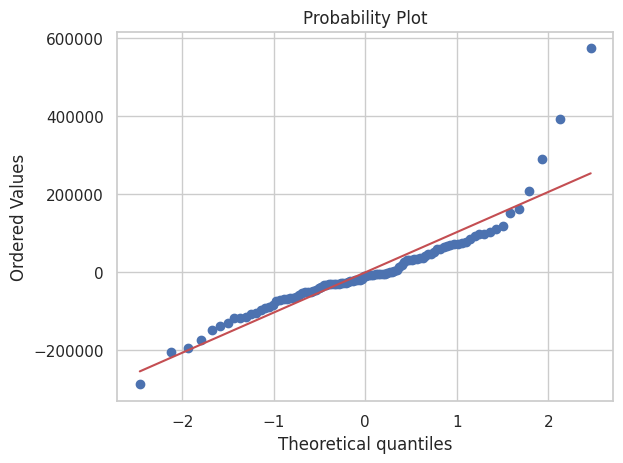

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df['Residual'], plot=pylab)
pylab.show()

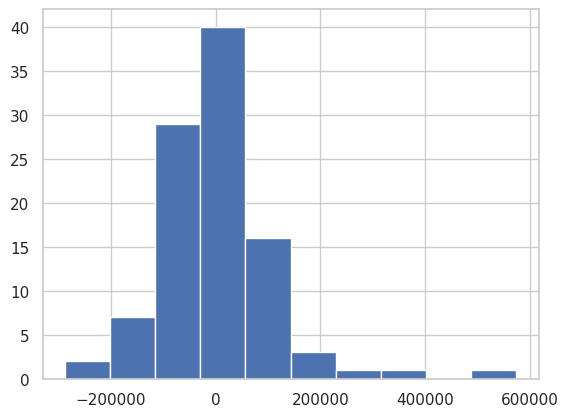

In [ ]:
plt.hist(df['Residual'])
plt.show()

In [ ]:
from scipy import stats
stats.jarque_bera(df)


SignificanceResult(statistic=85505120.79968095, pvalue=0.0)

Karena p-value lebih kecil dari 0,05 maka kami dapat menolak hipotesis nol. Oleh karena itu, kami memiliki cukup bukti untuk mengatakan bahwa Residual tidak berdistribusi secara normal.

**Gagal uji Normalitas**

**2. Uji Linearitas**

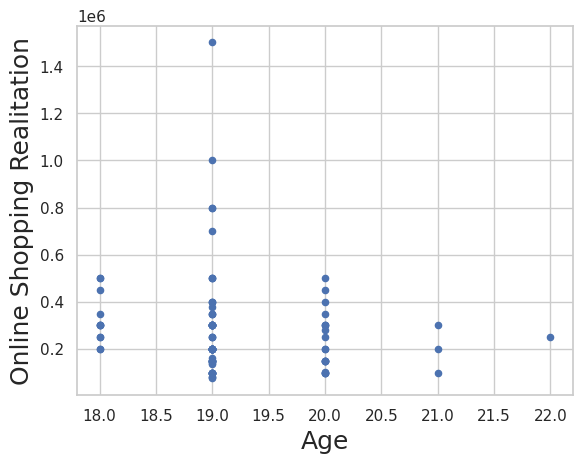

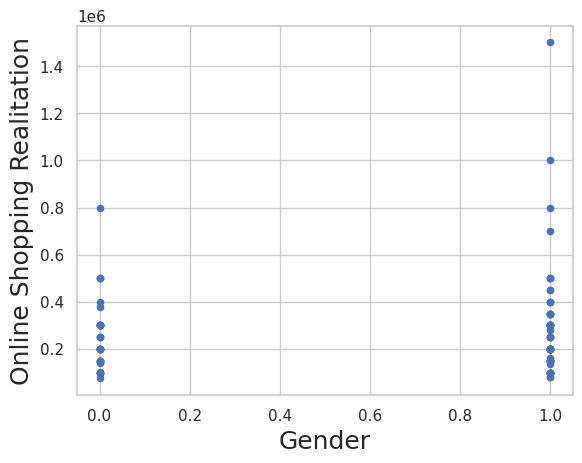

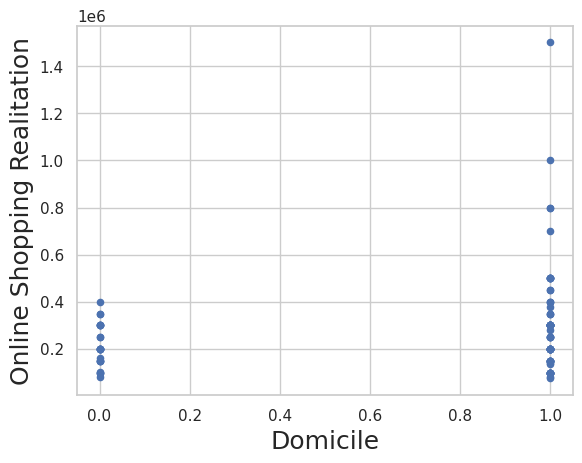

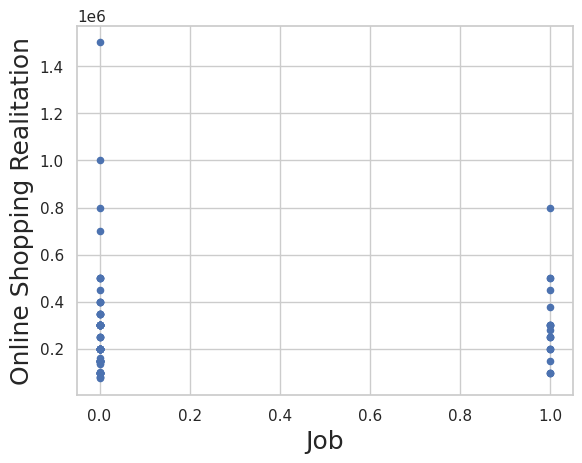

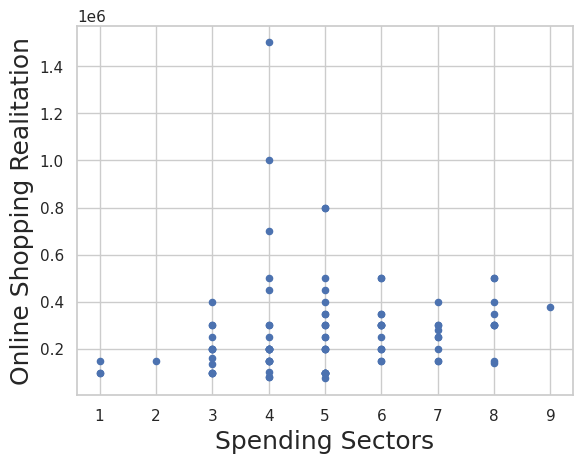

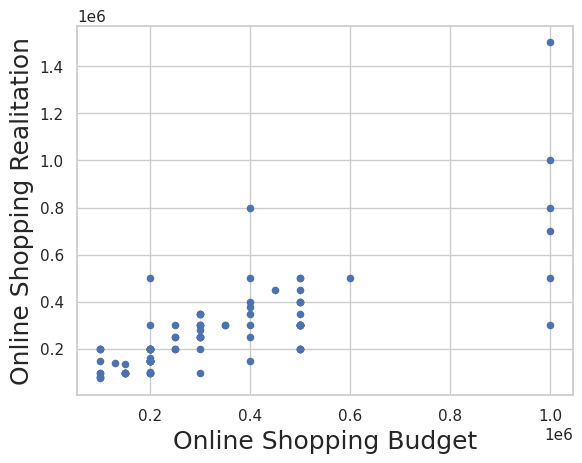

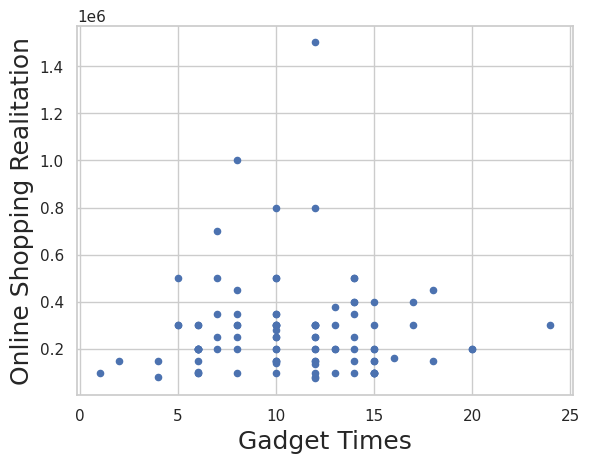

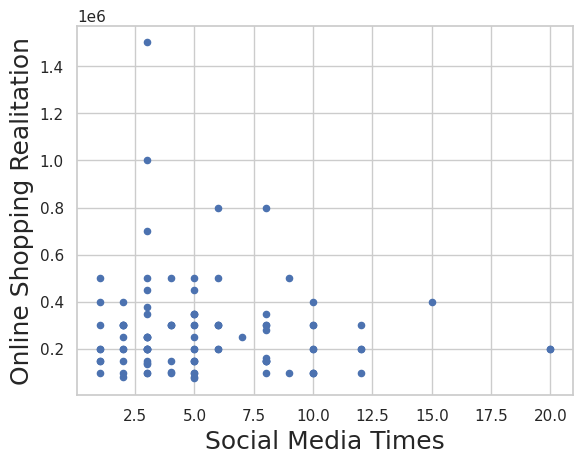

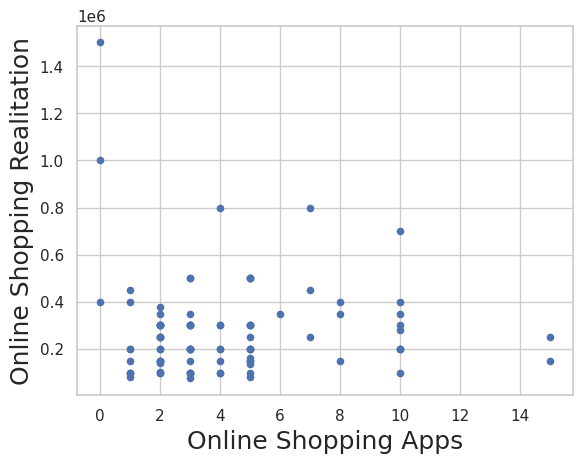

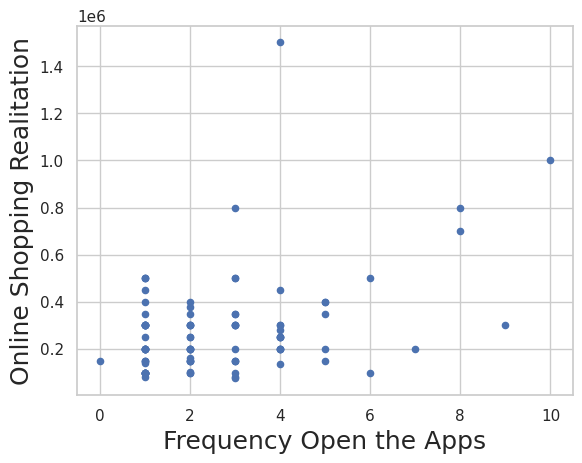

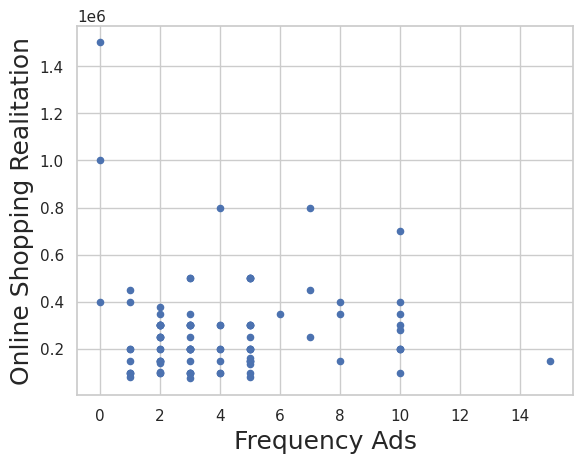

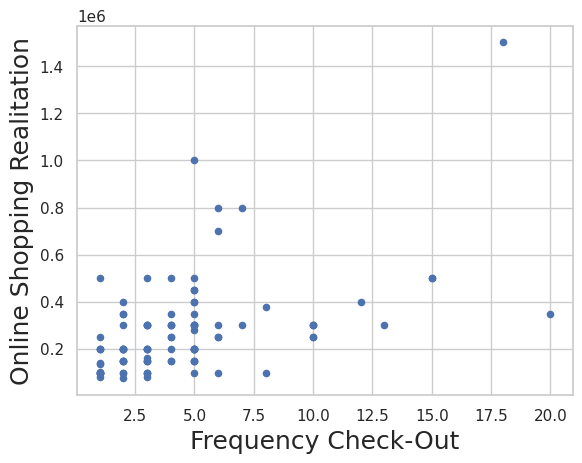

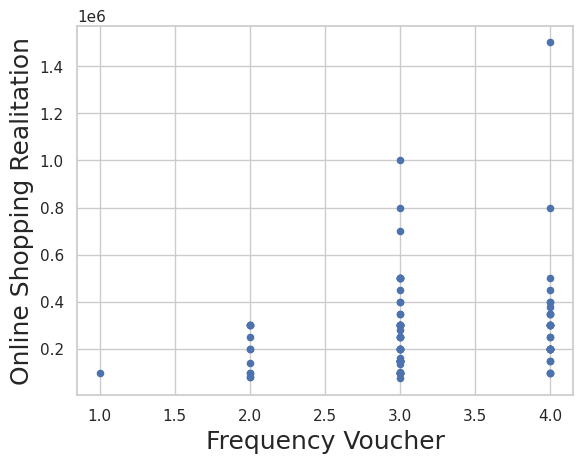

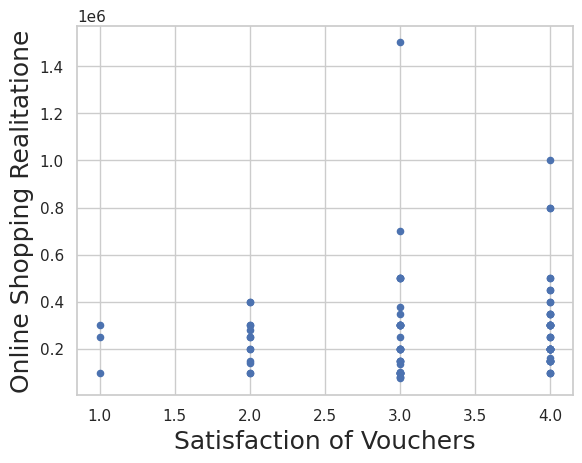

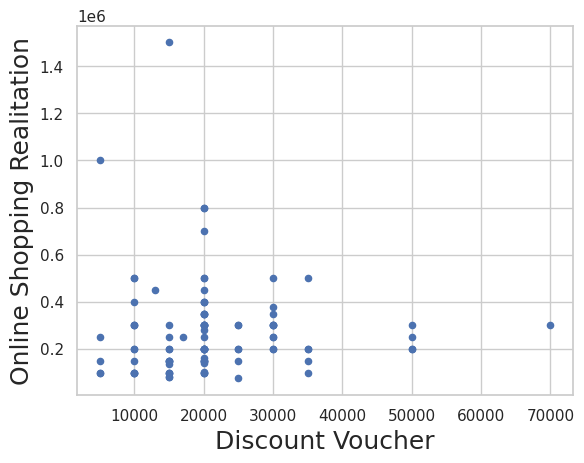

In [ ]:
df.plot.scatter(x='Age', y='Online Shopping Realitation')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Gender', y='Online Shopping Realitation')
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Domicile', y='Online Shopping Realitation')
plt.xlabel('Domicile', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Job', y='Online Shopping Realitation')
plt.xlabel('Job', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Spending Sectors', y='Online Shopping Realitation')
plt.xlabel('Spending Sectors', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Online Shopping Budget', y='Online Shopping Realitation')
plt.xlabel('Online Shopping Budget', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Gadget Times', y='Online Shopping Realitation')
plt.xlabel('Gadget Times', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Social Media Times', y='Online Shopping Realitation')
plt.xlabel('Social Media Times', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Online Shopping Apps', y='Online Shopping Realitation')
plt.xlabel('Online Shopping Apps', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Frequency Open the Apps', y='Online Shopping Realitation')
plt.xlabel('Frequency Open the Apps', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Frequency Ads', y='Online Shopping Realitation')
plt.xlabel('Frequency Ads', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Frequency Check-Out', y='Online Shopping Realitation')
plt.xlabel('Frequency Check-Out', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Frequency Voucher', y='Online Shopping Realitation')
plt.xlabel('Frequency Voucher', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Satisfaction of Vouchers', y='Online Shopping Realitation')
plt.xlabel('Satisfaction of Vouchers', fontsize=18)
plt.ylabel('Online Shopping Realitatione', fontsize=18)
plt.show()

df.plot.scatter(x='Discount Voucher', y='Online Shopping Realitation')
plt.xlabel('Discount Voucher', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()


Berdasarkan grafik diatas menunjukkan bahwa terdapat independent variable yang tidak memiliki hubungan linear dengan variable dependen. Oleh karena itu model regresi ini gagal untuk memenuhi uji linearitas.

**Gagal Uji Linearitas**

**3. Uji Homoskedestitas**

Menggunakan uji Breusch-Pagan

H0: Terdapat homoskedastisitas pada model (p-value lebih besar dari α=0.05)

H1: Tidak ada homoskedastisitas pada model/ terdapat heterokedastisitas pada model (p-value lebih kecil dari α=0.05)

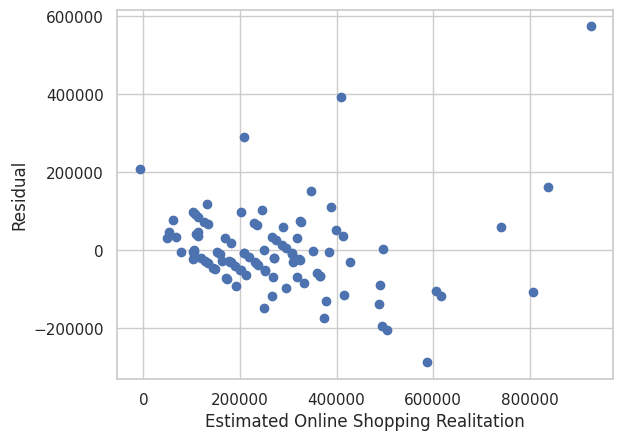

In [ ]:
plt.scatter(x=df['Estimated Online Shopping Realitation'], y=df['Residual'])
plt.xlabel('Estimated Online Shopping Realitation')
plt.ylabel('Residual')
plt.show()

In [ ]:
import statsmodels.api as sm

# Create model, fit, and print results
X = sm.add_constant(df[["Age","Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]].to_numpy())
y = df['Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y,X)
model = LR.fit()

# Test for heteroscedasticity using the Breusch-Pagan test
# NOTE: statsmodels refers to X variables as `exog` for exogenous
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05),
# reject the null hypothesis of homoscedasticity
if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")

Lagrange multiplier statistic: 29.440952679136966
Lagrange multiplier p-value:   0.014104927472199377
F-statistic:                   2.3366150942122794
P-value of F-statistic:        0.007624682216586123
Heteroscedasticity detected


Di sini, Lagrange multiplier untuk pengujian tersebut sama dengan 29.441 dan p-value yang sesuai menjadi sama dengan 0,0141. Karena p-value lebih kecil dari 0,05 maka kami dapat menolak hipotesis nol. Oleh karena itu, kami memiliki cukup bukti untuk mengatakan bahwa terdapat heteroskedastisitas dalam model regresi.

**Gagal Uji Homoskedastisitas**

**4. Uji Non Multikolinearitas**

In [ ]:
#CARA 1 dengan VIF

# Import packages
%pip install statsmodels
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Subset potential independent variables
X = df[["Age","Gender","Domicile","Job","Spending Sectors", "Online Shopping Budget","Gadget Times","Social Media Times","Online Shopping Apps","Frequency Open the Apps","Frequency Ads","Frequency Check-Out",
        "Frequency Voucher","Satisfaction of Vouchers", "Discount Voucher"]]

# Add column of constants for VIF function
X_const = add_constant(X)

vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(X.shape[1])],
                index = X.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
Age                         933.608002
Gender                        1.196070
Domicile                      1.223667
Job                           1.130494
Spending Sectors              1.284087
Online Shopping Budget        1.321482
Gadget Times                  1.263731
Social Media Times            1.693443
Online Shopping Apps          1.662078
Frequency Open the Apps       6.952792
Frequency Ads                 1.317627
Frequency Check-Out           7.210539
Frequency Voucher             1.513716
Satisfaction of Vouchers      1.239694
Discount Voucher              1.273119
dtype: float64


Batas atas nilai VIF yaitu 10. Berdasarkan hasil diatas, menunjukkan bahwa terdapat nilai VIF yang berada diatasa batas atas(Age, VIF = 933.6). Hal tersebut menunjukkan bahwa terdapat antar variabel independen yang memiliki korelasi yang kuat.

In [ ]:
#CARA 2 dengan meliaht Correlation Coefficient
X.corr()

,Age,Gender,Domicile,Job,Spending Sectors,Online Shopping Budget,Gadget Times,Social Media Times,Online Shopping Apps,Frequency Open the Apps,Frequency Ads,Frequency Check-Out,Frequency Voucher,Satisfaction of Vouchers,Discount Voucher
Age,1.000000,0.062815,-0.130887,0.224574,-0.108076,-0.152790,0.043558,-0.063776,-0.064959,-0.075205,-0.058831,-0.207380,-0.008750,0.002462,-0.054384
Gender,0.062815,1.000000,-0.103658,-0.116105,0.016526,-0.035561,0.066543,0.164174,0.115719,0.134484,0.093314,0.129508,0.077080,0.216341,-0.188534
Domicile,-0.130887,-0.103658,1.000000,0.078836,0.095668,0.153388,-0.071828,-0.049117,-0.140297,0.008790,-0.176579,0.069720,-0.029087,0.064623,-0.051722
Job,0.224574,-0.116105,0.078836,1.000000,0.084711,-0.001857,-0.030545,-0.119503,-0.101698,0.073832,-0.194912,0.068197,0.081636,0.081435,0.221627
Spending Sectors,-0.108076,0.016526,0.095668,0.084711,1.000000,0.095057,0.195792,0.171887,0.173060,0.010414,0.160798,0.355225,0.076396,0.012662,0.198381
Online Shopping Budget,-0.152790,-0.035561,0.153388,-0.001857,0.095057,1.000000,0.119214,0.016395,-0.079468,0.285285,-0.078101,0.327063,0.068217,0.026376,0.041377
Gadget Times,0.043558,0.066543,-0.071828,-0.030545,0.195792,0.119214,1.000000,0.578515,0.096470,-0.004768,0.112385,0.063529,0.104638,-0.064136,0.105609
Social Media Times,-0.063776,0.164174,-0.049117,-0.119503,0.171887,0.016395,0.578515,1.000000,0.000860,0.009517,0.040568,0.057827,0.014509,0.034048,-0.035159
Online Shopping Apps,-0.064959,0.115719,-0.140297,-0.101698,0.173060,-0.079468,0.096470,0.000860,1.000000,0.126749,0.917455,-0.017597,0.083938,0.161583,0.002155
Frequency Open the Apps,-0.075205,0.134484,0.008790,0.073832,0.010414,0.285285,-0.004768,0.009517,0.126749,1.000000,0.149979,0.308681,0.150448,0.259395,0.025408


<Axes: >

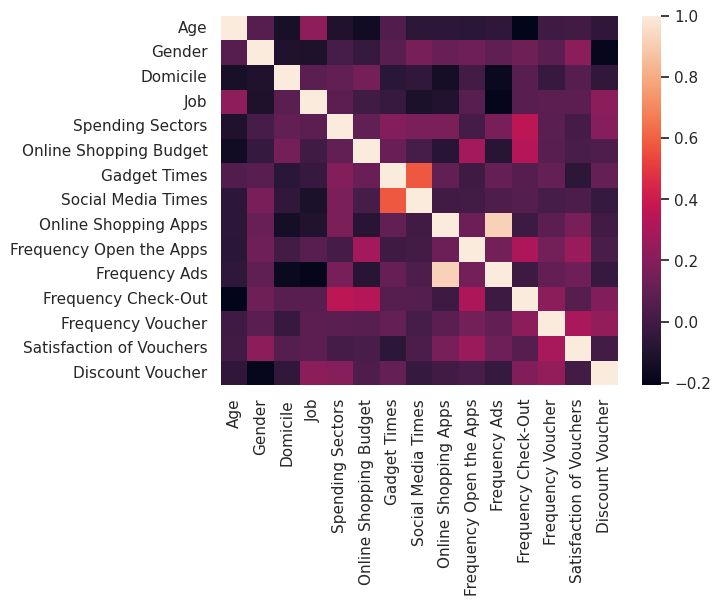

In [ ]:
sns.heatmap(X.corr())

Variable independent dikatakan berkorelasi jika memiliki koefisien korelasi diatas 0.5 atau dibawah -0.5

Berdasarkan hasil didapat diketahui bahwa variable Online Shopping Apps dan Frequency Ads memiliki korelasi yang tinggi yaitu sebesar 0.917455. Maka terdapat multikolinearitas dalam model ini.

**Gagal Uji Non Multikolinearitas**

**5. Uji Non Autokorelasi**

Menggunakan uji Durbin Watson

H0 : Tidak terdapat Autokorelasi

H1 : terdapat Autokorelasi

Tolak H0 : jika 0 < dW < dL  atau 4 - dL < dW < 4

Gagal tolak H0 : jika du < dW <4 - dU

Tidak ada keputusan  : jika dL < dW < dU atau 4 - dU < dW < 4 - dL

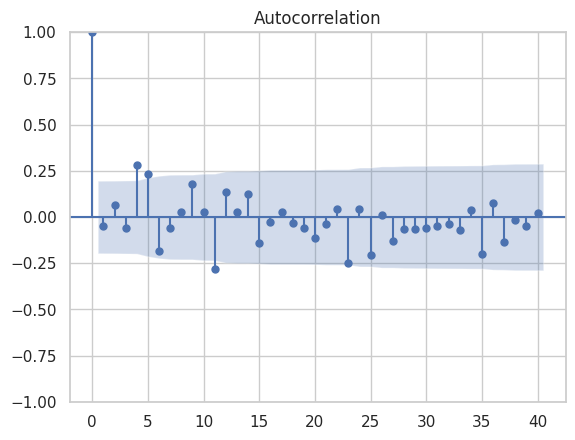

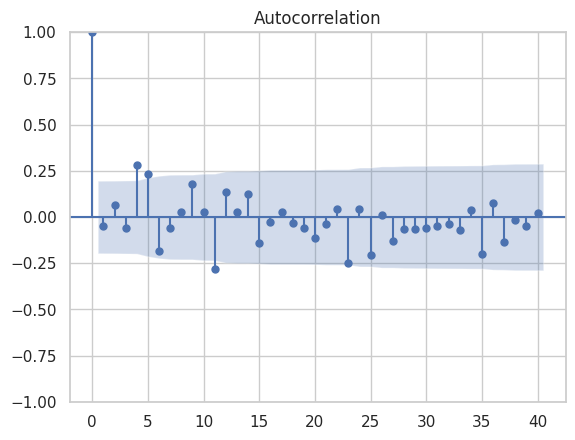

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Residual'], lags = 40)

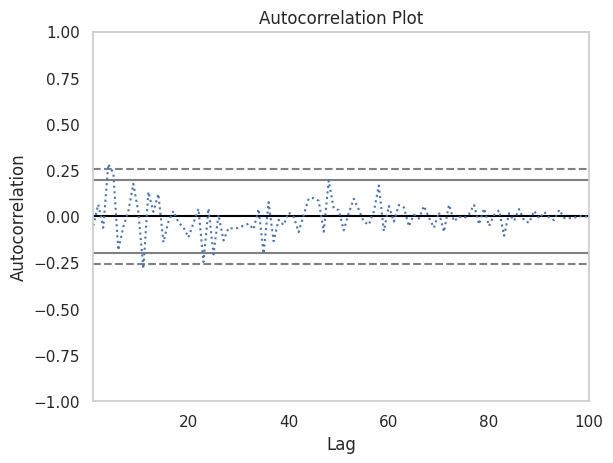

In [ ]:
pd.plotting.autocorrelation_plot(df['Residual'], linestyle = 'dotted')

# Display the plot
plt.title('Autocorrelation Plot')
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test

print('dW =', durbin_watson(model.resid))

dW = 2.099043105041859


Dengan α = 0.05 dan n 100 diperoleh dL = 1.3472 dan dU = 2.0264

Karena 4-dL< dW >4, maka tolak null hipotesis. Dapat disimpulkan bahwa terdapat autokorelasi negatif dalam model tersebut

**Gagal Uji Non Autokorelasi**

**Kesimpulan**

Berdasarkan uji asumsi klasik yang sudah dilakukan pada model regresi awal menunjukkan bahwa model regresi tersebut tidak memenuhi semua uji yang diberikan pada uji asumsi klasik

### B. Uji Klasik Model regresi Significance Variable

In [ ]:
X = sm.add_constant(df_new[["Online Shopping Budget","Frequency Open the Apps","Frequency Check-Out"]].to_numpy())
y = df_new['Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y,X)
model_new = LR.fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     64.20
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.33e-23
Time:                        02:52:59   Log-Likelihood:                -1309.1
No. Observations:                 100   AIC:                             2626.
Df Residuals:                      96   BIC:                             2637.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.181e+04    2.6e+04     -1.223      0.2

**1. Uji Normalitas**

Menggunakan uji Jarque-Bera

H0 : Residual berdistribusi normal (p-value > α=0.05)

H1 : Residual tidak Berdistribusi Normal (p-value < α=0.05)

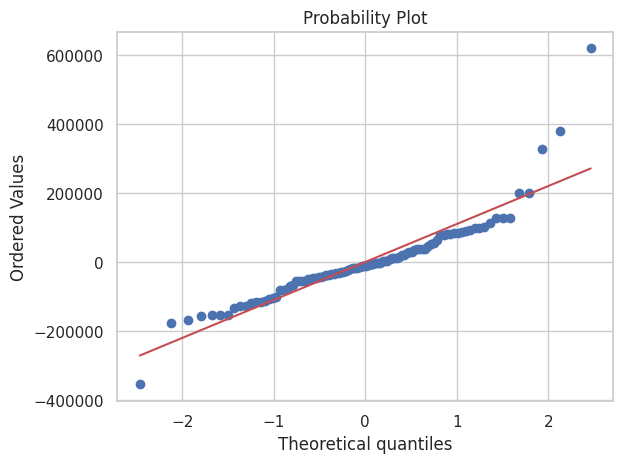

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_new['Residual'], plot=pylab)
pylab.show()

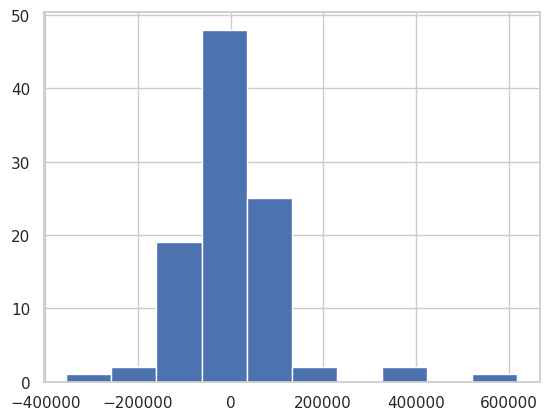

In [ ]:
plt.hist(df_new['Residual'])
plt.show()

In [ ]:
from scipy import stats
stats.jarque_bera(df_new)

SignificanceResult(statistic=3987294.4720413843, pvalue=0.0)

Berdasarkan hasil diatas, menunjukkan bahwa p-value Jarque Bera kurang dari α=0.05. Oleh karena itu, kita tolak hipotesis null. Sehingga residual tidak berdistribusi normal.

**Gagal Uji Normalitas**

**2. Uji Linearitas**

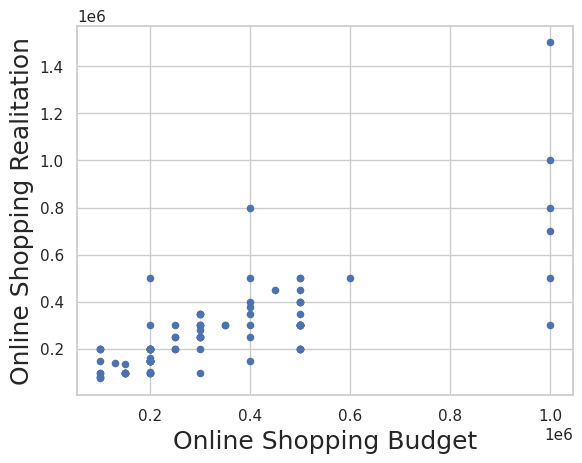

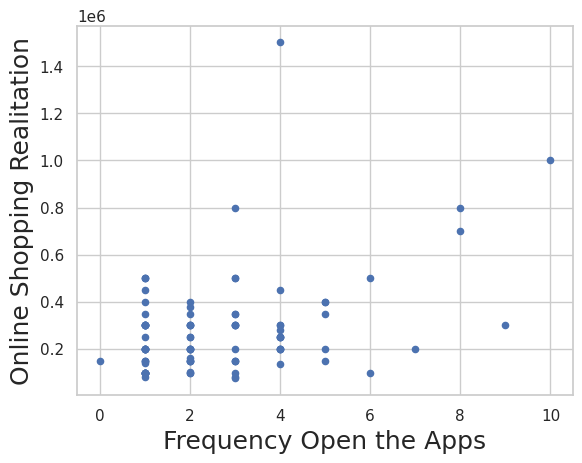

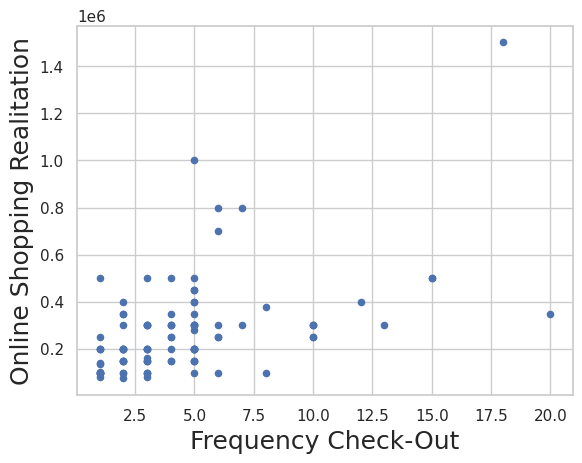

In [ ]:
df.plot.scatter(x='Online Shopping Budget', y='Online Shopping Realitation')
plt.xlabel('Online Shopping Budget', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Frequency Open the Apps', y='Online Shopping Realitation')
plt.xlabel('Frequency Open the Apps', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

df.plot.scatter(x='Frequency Check-Out', y='Online Shopping Realitation')
plt.xlabel('Frequency Check-Out', fontsize=18)
plt.ylabel('Online Shopping Realitation', fontsize=18)
plt.show()

[Berdasarkan grafik diatas menunjukkan bahwa setiap independent variable memiliki hubungan linear positif dengan variable dependen, walaupun hubungan linearnya tidak begitu kuat

**Sukse Uji Linearitas**]

**3. Uji Homoskedastitas**

Menggunakan uji Breusch-Pagan

H0: Terdapat homoskedastisitas pada model (p-value lebih besar dari α=0.05)

H1: Tidak ada homoskedastisitas pada model/ terdapat heterokedastisitas pada model (p-value lebih kecil dari α=0.05)

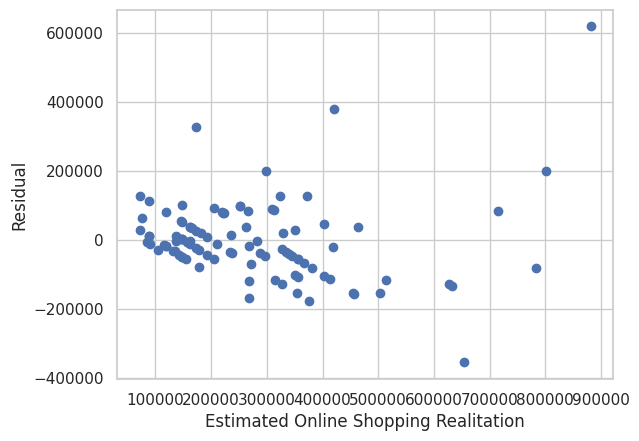

In [ ]:
plt.scatter(x=df_new['Estimated Online Shopping Realitation'], y=df_new['Residual'])
plt.xlabel('Estimated Online Shopping Realitation')
plt.ylabel('Residual')
plt.show()

In [ ]:
# Test for heteroscedasticity using the Breusch-Pagan test
# NOTE: statsmodels refers to X variables as `exog` for exogenous
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model_new.resid, model_new.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05),
# reject the null hypothesis of homoscedasticity
if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")

Lagrange multiplier statistic: 25.501610639067586
Lagrange multiplier p-value:   1.212676516157588e-05
F-statistic:                   10.953948769234831
P-value of F-statistic:        2.9867352141989094e-06
Heteroscedasticity detected


Karena nilai p-value = 0.000012 kurang dari α=0.05 maka kita reject null hipotesis. Oleh karena itu, terdapat heteroskedastisitas pada model.

**Gagal Uji Homoskedastisitas**

**4. Uji Non Multikolinearitas**

In [ ]:
#CARA 1 dengan VIF

# Import packages
%pip install statsmodels
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add column of constants for VIF function
X_new_const = add_constant(X_new)

vif = pd.Series([variance_inflation_factor(X_new_const.values, i) for i in range(X_new.shape[1])],
                index = X_new.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
Online Shopping Budget     4.732341
Frequency Open the Apps    1.168941
Frequency Check-Out        1.153842
dtype: float64


Batas atas nilai VIF yaitu 10. Berdasarkan hasil diatas, menunjukkan bahwa semua nilai VIF berada dibawah nilai 10. Hal tersebut menunjukkan bahwa tidak ada antar variabel independen yang memiliki korelasi yang kuat.

In [ ]:
#CARA 2 dengan meliaht Correlation Coefficient
X_new.corr()

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out
Online Shopping Budget,1.000000,0.285285,0.327063
Frequency Open the Apps,0.285285,1.000000,0.308681
Frequency Check-Out,0.327063,0.308681,1.000000


<Axes: >

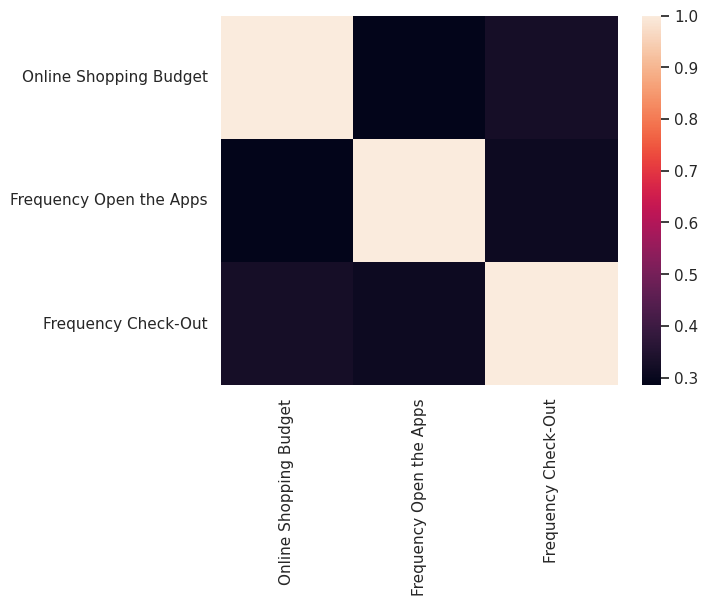

In [ ]:
sns.heatmap(X_new.corr())

Variable independent dikatakan berkorelasi jika memiliki koefisien korelasi diatas 0.5 atau dibawah -0.5

Berdasarkan hasil didapat diketahui bahwa antar variable independent memiliki koefisien korelasi dibawah 0.05. Maka tidak terdapat multikolinearitas dalam model ini.

**Sukses Uji Non Multikolinearitas**

**5. Uji Non Autokorelasi**

Menggunakan uji Durbin Watson

H0 : Tidak terdapat Autokorelasi

H1 : terdapat Autokorelasi

Tolak H0 : jika 0 < dW < dL  atau 4 - dL < dW < 4

Gagal tolak H0 : jika du < dW <4 - dU

Tidak ada keputusan  : jika dL < dW < dU atau 4 - dU < dW < 4 - dL

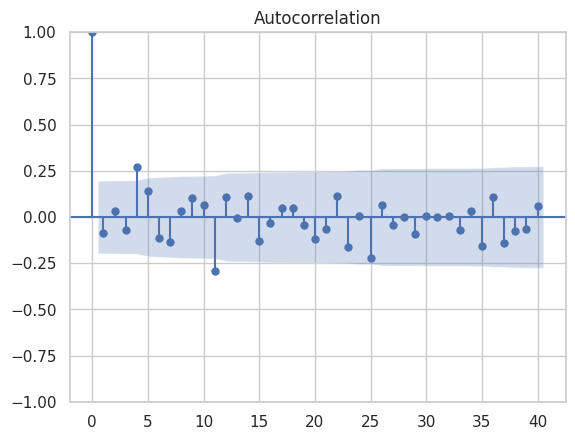

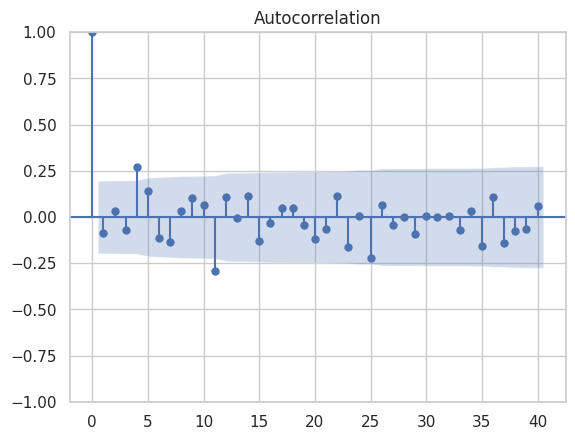

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_new['Residual'], lags = 40)

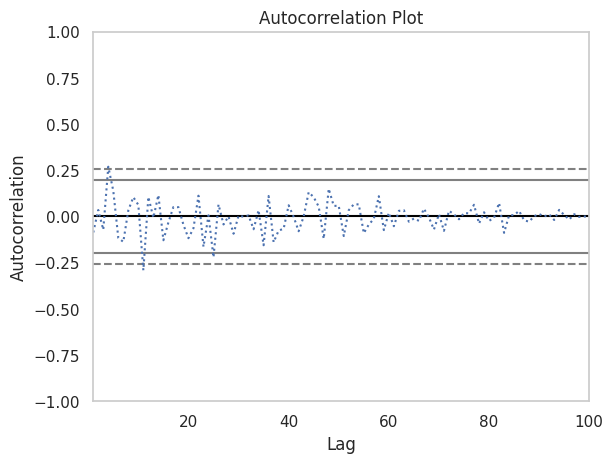

In [ ]:
pd.plotting.autocorrelation_plot(df_new['Residual'], linestyle = 'dotted')

# Display the plot
plt.title('Autocorrelation Plot')
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test

print('dW =', durbin_watson(model_new.resid))

dW = 2.172221939609108


Berdasarkan hasil tabel dengan α=0.05, n=100, dan k = 3, maka diperoleh dL=1.6131 dan dU=1.7364

Karena du < dW <4 - dU, maka kita tidak reject null hipotesis. Maka model ini tidak terdapat autokorelasi

**Sukses Uji Non Autokorelasi**

**Kesimpulan**

Berdasarkan uji asumsi klasik yang sudah dilakukan pada model regresi terbaru menunjukkan bahwa model regresi tersebut tidak memenuhi uji homoskedastisitas dan uji normalitas.

## Step 12: Transformation Model Regression

Transformasi model regeresi dibuat untuk bisa memEnuhi uji klasik model regresi.

Transformasi model dilakukan pada model regresi yang hanya memiliki signifikan variabel

Transformasi dilakukan dengan merubah variabel menjadi ln(variabel)


In [ ]:
from numpy import log as ln
import math

In [ ]:
df_new['Ln Online Shopping Budget'] =  ln(df_new['Online Shopping Budget']) #menambahkan kolom ln Online Shopping Budget
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared,Ln Online Shopping Budget
0,200000,3,4,150000,192139.066695,-42139.066695,1.775701e+09,12.206073
1,100000,1,2,100000,72021.983941,27978.016059,7.827694e+08,11.512925
2,500000,2,4,300000,356398.426474,-56398.426474,3.180783e+09,13.122363
3,300000,5,20,350000,503828.031507,-153828.031507,2.366306e+10,12.611538
4,200000,3,4,200000,192139.066695,7860.933305,6.179427e+07,12.206073
...,...,...,...,...,...,...,...,...
95,500000,1,4,300000,340114.190286,-40114.190286,1.609148e+09,13.122363
96,450000,1,5,450000,323707.296820,126292.703180,1.594985e+10,13.017003
97,1000000,1,5,300000,654703.889426,-354703.889426,1.258148e+11,13.815511
98,300000,1,3,300000,206068.087114,93931.912886,8.823204e+09,12.611538


In [ ]:
df_new['Ln Frequency Open the Apps'] =  ln(df_new['Frequency Open the Apps']) #menambahkan kolom ln Frequency Open the Apps
df_new

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared,Ln Online Shopping Budget,Ln Frequency Open the Apps
0,200000,3,4,150000,192139.066695,-42139.066695,1.775701e+09,12.206073,1.098612
1,100000,1,2,100000,72021.983941,27978.016059,7.827694e+08,11.512925,0.000000
2,500000,2,4,300000,356398.426474,-56398.426474,3.180783e+09,13.122363,0.693147
3,300000,5,20,350000,503828.031507,-153828.031507,2.366306e+10,12.611538,1.609438
4,200000,3,4,200000,192139.066695,7860.933305,6.179427e+07,12.206073,1.098612
...,...,...,...,...,...,...,...,...,...
95,500000,1,4,300000,340114.190286,-40114.190286,1.609148e+09,13.122363,0.000000
96,450000,1,5,450000,323707.296820,126292.703180,1.594985e+10,13.017003,0.000000
97,1000000,1,5,300000,654703.889426,-354703.889426,1.258148e+11,13.815511,0.000000
98,300000,1,3,300000,206068.087114,93931.912886,8.823204e+09,12.611538,0.000000


In [ ]:
df_new['Ln Frequency Check-Out'] =  ln(df_new['Frequency Check-Out']) #menambahkan kolom ln Frequency Check-Out
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out
0,200000,3,4,150000,192139.066695,-42139.066695,1.775701e+09,12.206073,1.098612,1.386294
1,100000,1,2,100000,72021.983941,27978.016059,7.827694e+08,11.512925,0.000000,0.693147
2,500000,2,4,300000,356398.426474,-56398.426474,3.180783e+09,13.122363,0.693147,1.386294
3,300000,5,20,350000,503828.031507,-153828.031507,2.366306e+10,12.611538,1.609438,2.995732
4,200000,3,4,200000,192139.066695,7860.933305,6.179427e+07,12.206073,1.098612,1.386294
...,...,...,...,...,...,...,...,...,...,...
95,500000,1,4,300000,340114.190286,-40114.190286,1.609148e+09,13.122363,0.000000,1.386294
96,450000,1,5,450000,323707.296820,126292.703180,1.594985e+10,13.017003,0.000000,1.609438
97,1000000,1,5,300000,654703.889426,-354703.889426,1.258148e+11,13.815511,0.000000,1.609438
98,300000,1,3,300000,206068.087114,93931.912886,8.823204e+09,12.611538,0.000000,1.098612


In [ ]:
df_new['Ln Online Shopping Realitation'] =  ln(df_new['Online Shopping Realitation']) #menambahkan kolom ln Online Shopping Realitation
df_new

,Online Shopping Budget,Frequency Open the Apps,Frequency Check-Out,Online Shopping Realitation,Estimated Online Shopping Realitation,Residual,Residual Squared,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation
0,200000,3,4,150000,192139.066695,-42139.066695,1.775701e+09,12.206073,1.098612,1.386294,12.206073
1,100000,1,2,100000,72021.983941,27978.016059,7.827694e+08,11.512925,0.000000,0.693147,11.512925
2,500000,2,4,300000,356398.426474,-56398.426474,3.180783e+09,13.122363,0.693147,1.386294,13.122363
3,300000,5,20,350000,503828.031507,-153828.031507,2.366306e+10,12.611538,1.609438,2.995732,12.611538
4,200000,3,4,200000,192139.066695,7860.933305,6.179427e+07,12.206073,1.098612,1.386294,12.206073
...,...,...,...,...,...,...,...,...,...,...,...
95,500000,1,4,300000,340114.190286,-40114.190286,1.609148e+09,13.122363,0.000000,1.386294,13.122363
96,450000,1,5,450000,323707.296820,126292.703180,1.594985e+10,13.017003,0.000000,1.609438,13.017003
97,1000000,1,5,300000,654703.889426,-354703.889426,1.258148e+11,13.815511,0.000000,1.609438,13.815511
98,300000,1,3,300000,206068.087114,93931.912886,8.823204e+09,12.611538,0.000000,1.098612,12.611538


In [ ]:
df_trans=df_new.loc[:, ['Ln Online Shopping Budget', 'Ln Frequency Open the Apps','Ln Frequency Check-Out','Ln Online Shopping Realitation']] #membuat dataframe baru
df_trans

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation
0,12.206073,1.098612,1.386294,12.206073
1,11.512925,0.000000,0.693147,11.512925
2,13.122363,0.693147,1.386294,13.122363
3,12.611538,1.609438,2.995732,12.611538
4,12.206073,1.098612,1.386294,12.206073
...,...,...,...,...
95,13.122363,0.000000,1.386294,13.122363
96,13.017003,0.000000,1.609438,13.017003
97,13.815511,0.000000,1.609438,13.815511
98,12.611538,0.000000,1.098612,12.611538


In [ ]:
df_trans.head(10)

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation
0,12.206073,1.098612,1.386294,12.206073
1,11.512925,0.000000,0.693147,11.512925
2,13.122363,0.693147,1.386294,13.122363
3,12.611538,1.609438,2.995732,12.611538
4,12.206073,1.098612,1.386294,12.206073
5,12.206073,-inf,1.609438,12.206073
6,12.429216,0.693147,2.302585,12.429216
7,12.206073,1.945910,1.609438,12.206073
8,12.429216,0.693147,0.000000,12.429216
9,12.206073,0.000000,0.000000,12.206073


Karena terdapat nilai infinity, maka data tersebut akan dihapus dari dataframe

In [ ]:
df_transs=df_trans.drop(df_trans.index[5])
df_transs

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation
0,12.206073,1.098612,1.386294,12.206073
1,11.512925,0.000000,0.693147,11.512925
2,13.122363,0.693147,1.386294,13.122363
3,12.611538,1.609438,2.995732,12.611538
4,12.206073,1.098612,1.386294,12.206073
6,12.429216,0.693147,2.302585,12.429216
7,12.206073,1.945910,1.609438,12.206073
8,12.429216,0.693147,0.000000,12.429216
9,12.206073,0.000000,0.000000,12.206073
10,13.122363,1.386294,1.609438,13.122363


In [ ]:
LR = LinearRegression()
X_trans= df_transs[["Ln Online Shopping Budget","Ln Frequency Open the Apps","Ln Frequency Check-Out"]]
y_transs = df_transs[["Ln Online Shopping Realitation"]]
model_transs = LR.fit(X_transs,y_transs)

In [ ]:
C_transs = model_transs.predict(X_transs)
df_transs['Estimated Ln Online Shopping Realitation']=C_transs
df_transs

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation,Estimated Ln Online Shopping Realitation
0,12.206073,1.098612,1.386294,12.206073,12.206073
1,11.512925,0.000000,0.693147,11.512925,11.512925
2,13.122363,0.693147,1.386294,13.122363,13.122363
3,12.611538,1.609438,2.995732,12.611538,12.611538
4,12.206073,1.098612,1.386294,12.206073,12.206073
...,...,...,...,...,...
95,13.122363,0.000000,1.386294,13.122363,13.122363
96,13.017003,0.000000,1.609438,13.017003,13.017003
97,13.815511,0.000000,1.609438,13.815511,13.815511
98,12.611538,0.000000,1.098612,12.611538,12.611538


In [ ]:
df_transs['Residual']=df_transs['Ln Online Shopping Realitation'] - df_transs['Estimated Ln Online Shopping Realitation']
df_transs

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation,Estimated Ln Online Shopping Realitation,Residual
0,12.206073,1.098612,1.386294,12.206073,12.206073,0.000000e+00
1,11.512925,0.000000,0.693147,11.512925,11.512925,0.000000e+00
2,13.122363,0.693147,1.386294,13.122363,13.122363,0.000000e+00
3,12.611538,1.609438,2.995732,12.611538,12.611538,0.000000e+00
4,12.206073,1.098612,1.386294,12.206073,12.206073,0.000000e+00
...,...,...,...,...,...,...
95,13.122363,0.000000,1.386294,13.122363,13.122363,0.000000e+00
96,13.017003,0.000000,1.609438,13.017003,13.017003,0.000000e+00
97,13.815511,0.000000,1.609438,13.815511,13.815511,1.776357e-15
98,12.611538,0.000000,1.098612,12.611538,12.611538,0.000000e+00


In [ ]:
df_transs['Residual Squared']=df_transs['Residual']**2
df_transs

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out,Ln Online Shopping Realitation,Estimated Ln Online Shopping Realitation,Residual,Residual Squared
0,12.206073,1.098612,1.386294,12.206073,12.206073,0.000000e+00,0.000000e+00
1,11.512925,0.000000,0.693147,11.512925,11.512925,0.000000e+00,0.000000e+00
2,13.122363,0.693147,1.386294,13.122363,13.122363,0.000000e+00,0.000000e+00
3,12.611538,1.609438,2.995732,12.611538,12.611538,0.000000e+00,0.000000e+00
4,12.206073,1.098612,1.386294,12.206073,12.206073,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
95,13.122363,0.000000,1.386294,13.122363,13.122363,0.000000e+00,0.000000e+00
96,13.017003,0.000000,1.609438,13.017003,13.017003,0.000000e+00,0.000000e+00
97,13.815511,0.000000,1.609438,13.815511,13.815511,1.776357e-15,3.155444e-30
98,12.611538,0.000000,1.098612,12.611538,12.611538,0.000000e+00,0.000000e+00


In [ ]:
X_transs= sm.add_constant(df_transs[["Ln Online Shopping Budget","Ln Frequency Open the Apps","Ln Frequency Check-Out"]].to_numpy())
y_transs = df_transs['Ln Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y_transs,X_transs)
model_transs = LR.fit()
print(model_transs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.717e+28
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:53:08   Log-Likelihood:                 2997.4
No. Observations:                  99   AIC:                            -5987.
Df Residuals:                      95   BIC:                            -5976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.487e-14   3.96e-14      0.628      0.5

**Analisis**

Berdasarkan hasil di atas diketahui bahwa variabel yang signifikan yaitu $x_1$(Online Shopping Budget) dan $x_3$(Frequency Check-Out)

Model Regresi Linear
##### $\hat{y}$ = 3.4431 + 0.6853 $x_1$ +  0.0983$x_2$ + 0.1782$x_3$

Dari model regresi tersebut, dapat diartikan bahwa:

Intercept $cons$ adalah perpotongan dari variable $x$ terhadap Ln Online Shopping Realitation atau nilai Ln Online Shopping Realitation yang diharapkan ketika variable $x$ sama dengan nol. Dalam hal ini intercept dari data tersebut adalah sebesar 3.4431.

Nilai dari $x_1$ memberikan informasi tentang seberapa besar perubahan dalam Ln Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Ln Online Shopping Budget. Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 0.6853.

Nilai dari $x_2$ memberikan informasi tentang seberapa besar perubahan dalam Ln Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Ln Frequency Open The Apps. Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 0.0983.

Nilai dari $x_3$ memberikan informasi tentang seberapa besar perubahan dalam Ln Online Shopping Realitation yang diharapkan untuk setiap unit perubahan dalam Ln Frequency Checkout. Berdasarkan data tersebut kita memperoleh bahwa koefisiennya bernilai 0.1782.

### Uji Asumsi Klasik Pada Transformasi Model

**1. Uji Normalitas**

Menggunakan uji Jarque-Bera

H0 : Residual berdistribusi normal (p-value > α=0.05)

H1 : Residual tidak Berdistribusi Normal (p-value < α=0.05)

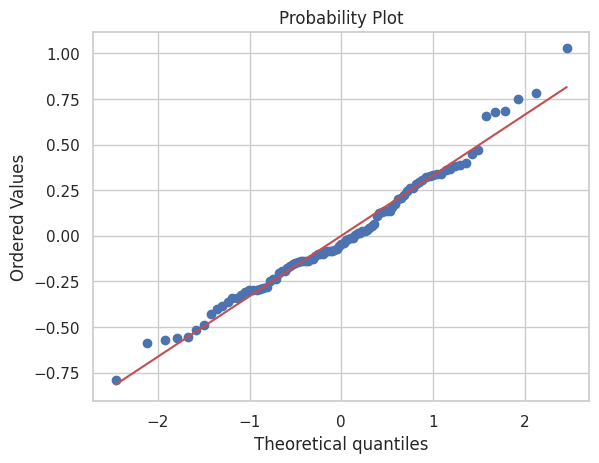

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_transs['Residual'], plot=pylab)
pylab.show()

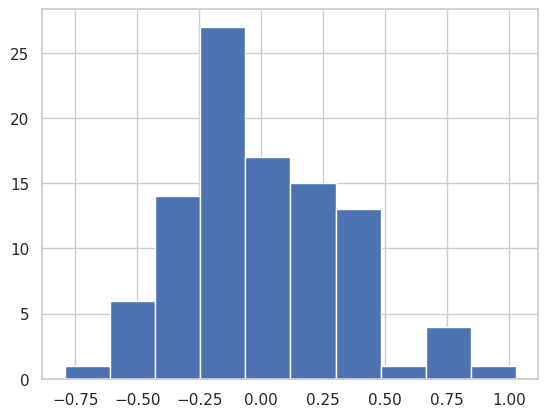

In [ ]:
plt.hist(df_transs['Residual'])
plt.show()

In [ ]:
X_transs= sm.add_constant(df_transs[["Ln Online Shopping Budget","Ln Frequency Open the Apps","Ln Frequency Check-Out"]].to_numpy())
y_transs = df_transs['Ln Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y_transs,X_transs)
model_transs = LR.fit()
print(model_transs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     70.58
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.32e-24
Time:                        20:00:29   Log-Likelihood:                -30.180
No. Observations:                  99   AIC:                             68.36
Df Residuals:                      95   BIC:                             78.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4431      0.757      4.550      0.0

Berdasarkan hasil Regresi diatas menunjukkan bahwa p-value(Jarque-Bera) = 0.133. Hal tersebut menunjukkan bahwa p-value > α=0.05. Oleh karena itu kita tidak dapat menolak hipotesis null. Sehingga dapat disimpulkan bahwa Residual pada model ini berdistribusi normal.

**Sukses Uji Normalitas**

**2. Uji Linearitas**

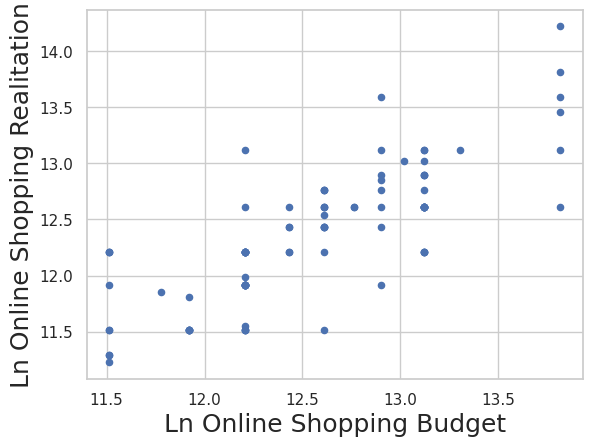

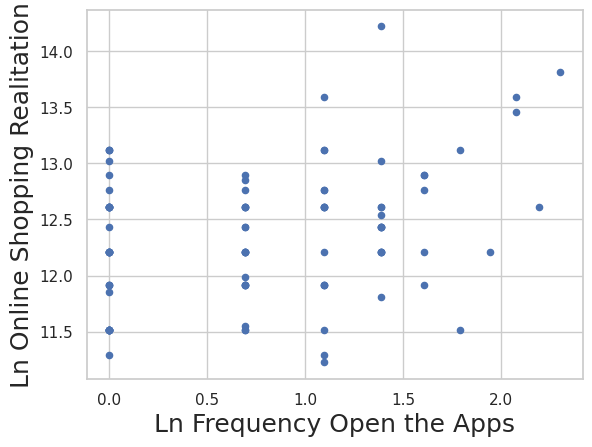

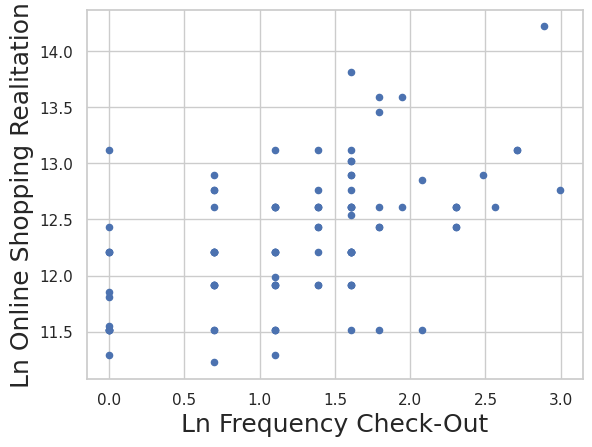

In [ ]:
df_transs.plot.scatter(x='Ln Online Shopping Budget', y='Ln Online Shopping Realitation')
plt.xlabel('Ln Online Shopping Budget', fontsize=18)
plt.ylabel('Ln Online Shopping Realitation', fontsize=18)
plt.show()

df_transs.plot.scatter(x='Ln Frequency Open the Apps', y='Ln Online Shopping Realitation')
plt.xlabel('Ln Frequency Open the Apps', fontsize=18)
plt.ylabel('Ln Online Shopping Realitation', fontsize=18)
plt.show()

df_trans.plot.scatter(x='Ln Frequency Check-Out', y='Ln Online Shopping Realitation')
plt.xlabel('Ln Frequency Check-Out', fontsize=18)
plt.ylabel('Ln Online Shopping Realitation', fontsize=18)
plt.show()

Berdasarkan grafik diatas menunjukkan bahwa setiap independent variable memiliki hubungan linear positif dengan variable dependen, walaupun hubungan linearnya tidak begitu kuat

**Sukse Uji Linearitas**

**3. Uji Homoskedastisitas**

Menggunakan uji Breusch-Pagan

H0: Terdapat homoskedastisitas pada model (p-value lebih besar dari α=0.05)

H1: Tidak ada homoskedastisitas pada model/ terdapat heterokedastisitas pada model (p-value lebih kecil dari α=0.05)

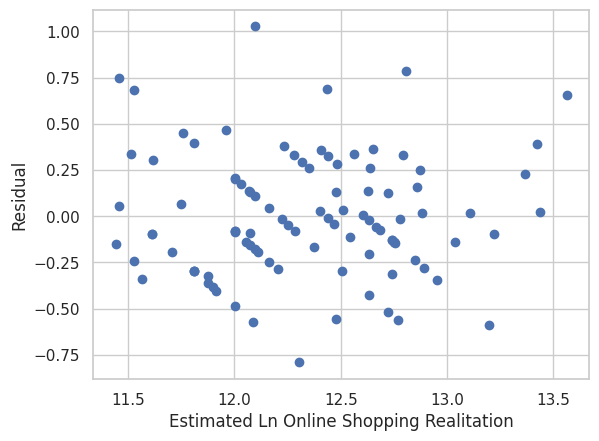

In [ ]:
plt.scatter(x=df_transs['Estimated Ln Online Shopping Realitation'], y=df_transs['Residual'])
plt.xlabel('Estimated Ln Online Shopping Realitation')
plt.ylabel('Residual')
plt.show()

In [ ]:
import statsmodels.api as sm

# Create model, fit, and print results
X_transs= sm.add_constant(df_transs[["Ln Online Shopping Budget","Ln Frequency Open the Apps","Ln Frequency Check-Out"]].to_numpy())
y_transs = df_transs['Ln Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y_transs,X_transs)
model = LR.fit()

# Test for heteroscedasticity using the Breusch-Pagan test
# NOTE: statsmodels refers to X variables as `exog` for exogenous
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05),
# reject the null hypothesis of homoscedasticity
if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")

Lagrange multiplier statistic: 0.47148078808241356
Lagrange multiplier p-value:   0.9251107679887598
F-statistic:                   0.15153201403373207
P-value of F-statistic:        0.9284702013203628
No heteroscedasticity detected


Di sini, Lagrange multiplier p-value sama dengan 0,925. Karena p-value lebih besar dari 0,05 maka kami tidak dapat menolak hipotesis nol. Oleh karena itu, kami memiliki cukup bukti untuk mengatakan bahwa tidak terdapat heteroskedastisitas dalam model regresi.

**Sukses Uji Homoskedastisitas**

**4. Uji Non Multikolinearitas**

In [ ]:
#Melihat Correlation Coefficient
X_transs= df_transs[["Ln Online Shopping Budget","Ln Frequency Open the Apps","Ln Frequency Check-Out"]]
X_transs.corr()

,Ln Online Shopping Budget,Ln Frequency Open the Apps,Ln Frequency Check-Out
Ln Online Shopping Budget,1.000000,0.190216,0.381985
Ln Frequency Open the Apps,0.190216,1.000000,0.365340
Ln Frequency Check-Out,0.381985,0.365340,1.000000


<Axes: >

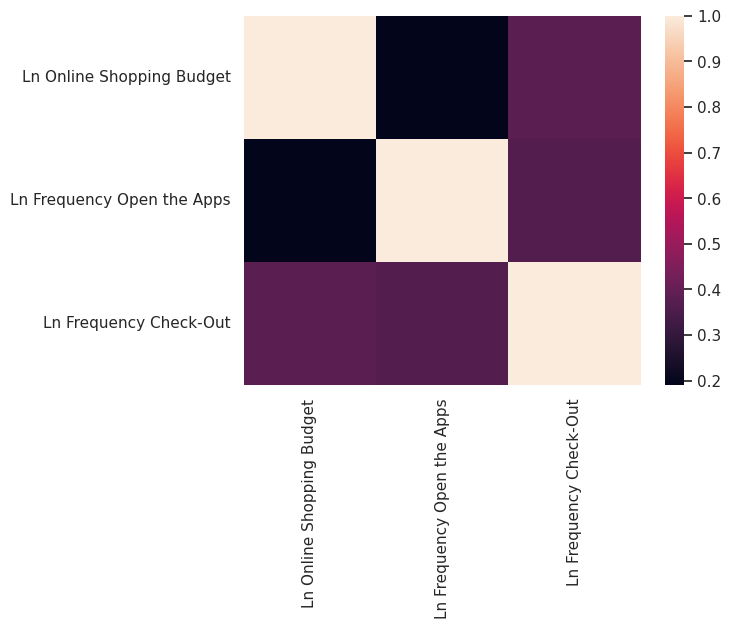

In [ ]:
sns.heatmap(X_transs.corr())

Variable independent dikatakan berkorelasi jika memiliki koefisien korelasi diatas 0.5 atau dibawah -0.5

Berdasarkan hasil didapat diketahui bahwa antar variableindependen tidak memiliki korelasi yang tinggi (dibawah 0.05). Maka, tidak terdapat multikolinearitas dalam model ini.

**Sukses Uji Non Multikolinearitas**

**6. Uji Non Autokorelasi**

Menggunakan uji Durbin Watson

H0 : Tidak terdapat Autokorelasi

H1 : terdapat Autokorelasi

Tolak H0 : jika 0 < dW < dL  atau 4 - dL < dW < 4

Gagal tolak H0 : jika du < dW <4 - dU

Tidak ada keputusan  : jika dL < dW < dU atau 4 - dU < dW < 4 - dL

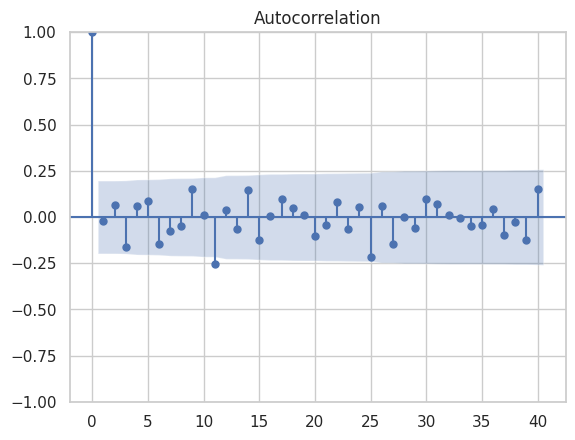

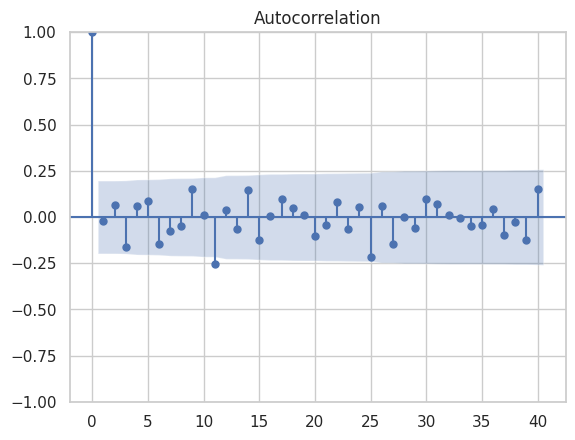

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_transs['Residual'], lags = 40)

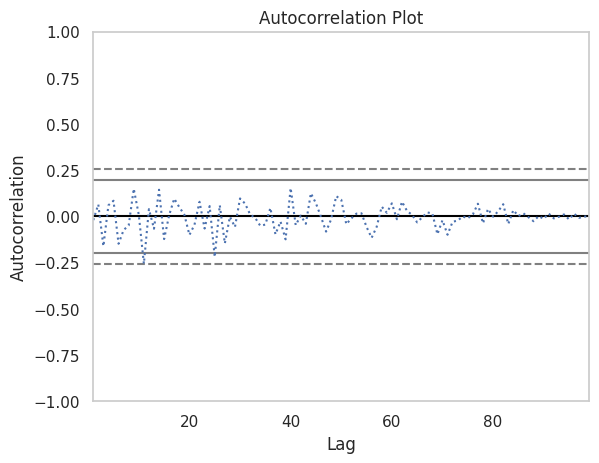

In [ ]:
pd.plotting.autocorrelation_plot(df_transs['Residual'], linestyle = 'dotted')

# Display the plot
plt.title('Autocorrelation Plot')
plt.show()

In [ ]:
X_transs= sm.add_constant(df_transs[["Ln Online Shopping Budget","Ln Frequency Open the Apps","Ln Frequency Check-Out"]].to_numpy())
y_transs = df_transs['Ln Online Shopping Realitation'].to_numpy()
LR = sm.OLS(y_transs,X_transs)
model_transs = LR.fit()
print(model_transs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     70.58
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.32e-24
Time:                        20:31:07   Log-Likelihood:                -30.180
No. Observations:                  99   AIC:                             68.36
Df Residuals:                      95   BIC:                             78.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4431      0.757      4.550      0.0

Berdasarkan hasil diatas diketahui bahwa dW=2.034

Dengan α=0.05, n=99, dan k=3, maka diperoleh dL=1.5683 dan dU=1.7799.

Karena dU < dW < 4-dU maka kita tidak bisa menolak null hypothesis. Sehingga tidak terdapat autokorelasi pada model ini

**Sukses Uji Non Autokorelasi**

**Kesimpulan**

Berdasarkan uji asumsi klasik yang telah dilalukan menunjukkan bahwa model regresi transformasi memenuhi semua uji klasik model regresi